<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
    
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>NLP based Chatbot in domain of Industrial safety</center></font></h1>
<h1><center>Natural Language Processing - Capstone</center></h1>
<h2><right>BATCH: AIML-MAY-23-A</right></h2>
<h3><right>Project Group: Group-8</h3></right>

<p>
<li>Pranav Kumar</li>
<li>Naga Supraja Ramireddy</li>
<li>Omkar Khadamkar</li>
<li>Tanmoy Bose</li>
<li>Hariom Srivastava</li>
</p>

# Problem Statement

### • DOMAIN: Industrial safety. NLP based Chatbot.

### • CONTEXT:

- The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
### • DATA DESCRIPTION:
- This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
- Columns description:
    - ‣ Data: timestamp or time/date information
    - ‣ Countries: which country the accident occurred (anonymised)
    - ‣ Local: the city where the manufacturing plant is located (anonymised)
    - ‣ Industry sector: which sector the plant belongs to
    - ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    - ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    - ‣ Genre: if the person is male of female
    - ‣ Employee or Third Party: if the injured person is an employee or a third party
    - ‣ Critical Risk: some description of the risk involved in the accident
    - ‣ Description: Detailed description of how the accident happened.

### • PROJECT OBJECTIVE:

- Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

##### 1. Milestone 1: [ Score: 40 points ]
##### ‣ Input: Context and Dataset
##### ‣ Process:
- ‣ Step 1: Import the data [ 3 points ]
- ‣ Step 2: Data cleansing [ 5 points ]
- ‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]
- ‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]
- ‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]
- ‣ Step 6: Interim report [ 10 points ]
- ‣ Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

### Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
# installing libraries to use word embeddings
!pip install gensim -q
!{sys.executable} -m pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.6 MB/s eta 0:00:00


In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming
nltk.download('omw-1.4')    # needed for lemmetization
nltk.download('averaged_perceptron_tagger') # needed for lemmetization tags of part-of-speech

import contractions #Needed to expand english contactions like - I'm -> I am

# to remove common stop words
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# For Plotting WordCloud and taking frequent words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For bag of words and text to numeric vectorization
from sklearn.feature_extraction.text import CountVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# Sampler for minority classes
from imblearn.over_sampling import RandomOverSampler, SMOTE

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

#Importing the classification models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Importing ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Step 1: Import the data

In [3]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
# loading the dataset
given_sheet = 'Data Set - industrial_safety_an'
file_name = '/content/drive/MyDrive/NLP_Chatbot/NLP_Chatbot_Capstone/Industrial_safety_and_health_database_with_accidents_description.xlsx'
df = pd.read_excel(file_name, sheet_name=given_sheet)

In [5]:
# creating a copy of the dataset
data = df.copy()
# Printing the shape of the dataset
print(f'Shape of Imported Data:{data.shape}')
# Print first 5 rows of data
data.head()

Shape of Imported Data:(425, 11)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


## Step 2: Data cleansing

#### dropping the identifier column from data as it won't be adding any value in analysis

In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
# Print random 5 rows of data
data.sample(5)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
21,2016-02-09,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"In the Raise chamber, when the operator and assistant removed the drilling bar from the 71R drilling machine - weight approx. 500 Kg - holding it at the top with a 2 TM stroke and assisted with jibs to move horizontally, the operator's jib on the bottom slides by moving the top of the drill bar causing the assistant's bar to enforce his assistant's hand between the bar and the piston of the equipment."
400,2017-06-04,Country_02,Local_05,Metals,I,IV,Male,Employee,Others,Employee reports that when trying to unlock a cathodic sheet with the digger the same did not realize that the blade was pressed so that the cable projected and hit his face.
56,2016-03-13,Country_01,Local_03,Mining,I,III,Male,Employee,Others,"In circumstances that the Operator 176 was going from level 620 to level 640, he noticed that the hydraulic pump's inspection cover (18 ""x32"" x3 / 8 "", 15 Kg approx.) Was about to fall, so he stopped the equipment, activates the cats and climbs up the upper part of the equipment and in moments that accommodated the cover it slides on its middle finger causing the injury."
348,2017-03-06,Country_01,Local_04,Mining,I,III,Male,Third Party (Remote),Fall,"Being 5:40 pm approx. when the collaborator Mr. Duval (sampler), was preparing to change and remove the buckets from the pulp samples of the plant courier, he slipped and fell to the ground supporting himself with the right hand generating the lesion described."
386,2017-05-06,Country_01,Local_01,Mining,III,IV,Male,Third Party,Manual Tools,"In Circumstances that the staff was performing the rhyming of caving HW, the 1.5 m HW pipe was suspended Approximately 5 cm from the floor, the assistant placed the stilson key No. 36 on the HW pipe to fit the pipe at a height of 10 cm from the base of the rod holder, which the operator operates the chuck to slide this back, causing the pipe to slide causing the tip of the fourth finger of the assistant's right hand to be caught between the stilson key and the base of the rod holder. At the time of the event the collaborator used all his Epps."


### Renaming meaningful column headers looks typos in data collection

In [8]:
# Rename 'Data'-> 'Date', 'Countries'->'Country', 'Genre'->'Gender', 'Employee or Third Party'->'Employemee Type' columns in Data frame
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee Type'}, inplace=True)

In [9]:
# checking updated headers
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


### Checking for missing values

In [10]:
# Check for missing values
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

#### There are no mising values in the data

### Checking for duplicate values

In [11]:
# Check for duplicate values
data.duplicated().sum()

7

#### Found `7` duplicates rows, we will drop duplicates

In [12]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [13]:
# Verifying for duplicate values again - Should be 0
data.duplicated().sum()

0

### Converting date field as categorical columns - year, month, year-quarter and year-month

In [14]:
data['year'] = pd.to_datetime(data['Date']).dt.year.astype(str)
data['month'] = pd.to_datetime(data['Date']).dt.month.astype(str)
data['day'] = pd.to_datetime(data['Date']).dt.day.astype(str)
data['year_month'] = pd.to_datetime(data['Date']).dt.to_period('M').astype(str)
data['quarter'] = pd.to_datetime(data['Date']).dt.quarter.astype(str)
data['year_quarter'] = pd.to_datetime(data['Date']).dt.to_period('Q').astype(str)
data['Date'] = pd.to_datetime(data['Date']).astype(str)

### Checking the statistical summary

In [15]:
data.describe()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,year,month,day,year_month,quarter,year_quarter
count,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
unique,287,3,12,3,5,6,2,3,33,411,2,12,31,19,4,7
top,2017-02-08,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud.",2016,2,8,2016-03,1,2016Q2
freq,6,248,89,237,309,141,396,185,229,2,283,61,25,34,150,85


- Top incidents from the `Mining` Industry Sector with 237 counts
- Top incidents from `Country_01` with 248 counts
- Top incidents are from Accident Level- `I` with 309 counts
- Top incidents are from `Male` Gender with 396 counts
- Top incidents are from `Others` Category of Critical Risk with 229 counts.
- Top incidents are from year `2016` with 283 counts
- Also, most `33 unique values for Critical Risk`, followed by `local with 12` and `rest all columns upto 6 unique values`

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee Type             418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
 10  year                      418 non-null    object
 11  month                     418 non-null    object
 12  day                       418 non-null    object
 13  year_month                418 non-null    object
 14  quarter                   

- All columns are now of type object

### Checking unique values for columns

In [17]:
columns_tocheck = ['Country','Local','Industry Sector','Accident Level','Potential Accident Level','Gender','Employee Type','Critical Risk','year','month','year_month','quarter','year_quarter']
for col in columns_tocheck:
  print(f'Unique values for col: {col}\n {data[col].unique()}\n')

Unique values for col: Country
 ['Country_01' 'Country_02' 'Country_03']

Unique values for col: Local
 ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Unique values for col: Industry Sector
 ['Mining' 'Metals' 'Others']

Unique values for col: Accident Level
 ['I' 'IV' 'III' 'II' 'V']

Unique values for col: Potential Accident Level
 ['IV' 'III' 'I' 'II' 'V' 'VI']

Unique values for col: Gender
 ['Male' 'Female']

Unique values for col: Employee Type
 ['Third Party' 'Employee' 'Third Party (Remote)']

Unique values for col: Critical Risk
 ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venom

### Renaming values for Critical Risk :
- "\nNot applicable" -> "Not applicable" and
- "Pressurized Systems / Chemical Substances" -> "Pressurized Systems/Chemical Substances"

In [18]:
data['Critical Risk'] = data['Critical Risk'].replace(to_replace="\nNot applicable",
           value="Not applicable")
data['Critical Risk'] = data['Critical Risk'].replace(to_replace="Pressurized Systems / Chemical Substances",
           value="Pressurized Systems/Chemical Substances")

In [19]:
print(f"Unique values for col: Critical Risk\n {data['Critical Risk'].unique()}\n")

Unique values for col: Critical Risk
 ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems/Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' 'Not applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Projection/Manual Tools'
 'Individual protection equipment' 'Electrical Shock'
 'Projection of fragments']



### Exploratory Data Analysis (Non text columns - except `Description` Column)

In [20]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Univariate Analysis

##### Distribution of incident's Accident Level

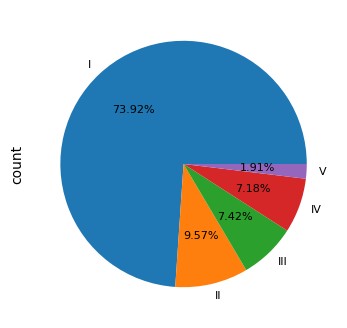

In [21]:
# Visualize a Pie-chart and print percentage
data['Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

##### Observations for `Accident Level` values distrubtion
- Most of incidents are from `Accident Level - I (73.9%)` i.e these are least severe incidents.
- Most Severe incidents of `Accident Level - V (1.9%)`
- No data for `Accident Level - VI`
- Data Distribution is very imbalanced with ~74% Type-I and 1.91% Type V

##### Distribution of incident's Potential Accident Level

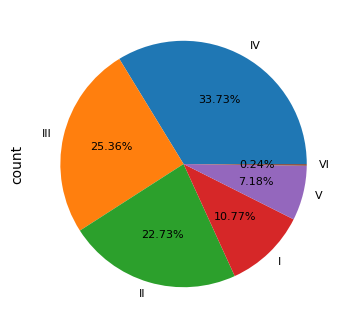

In [22]:
data['Potential Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

##### Observations for `Potential Accident Level` values distrubtion
- Here the values distribution are better than `Accident Level`.
- `Type VI` and `Type V` values are undersampled, especially `Type-VI with 0.24%` followed by `Type-V 7.18%` and `Type-I(10.77%)`.
- `Type-II, Type-III and Type-IV` are comparatively evenly distributed.

##### Distribution of incident's `Critical Risk`

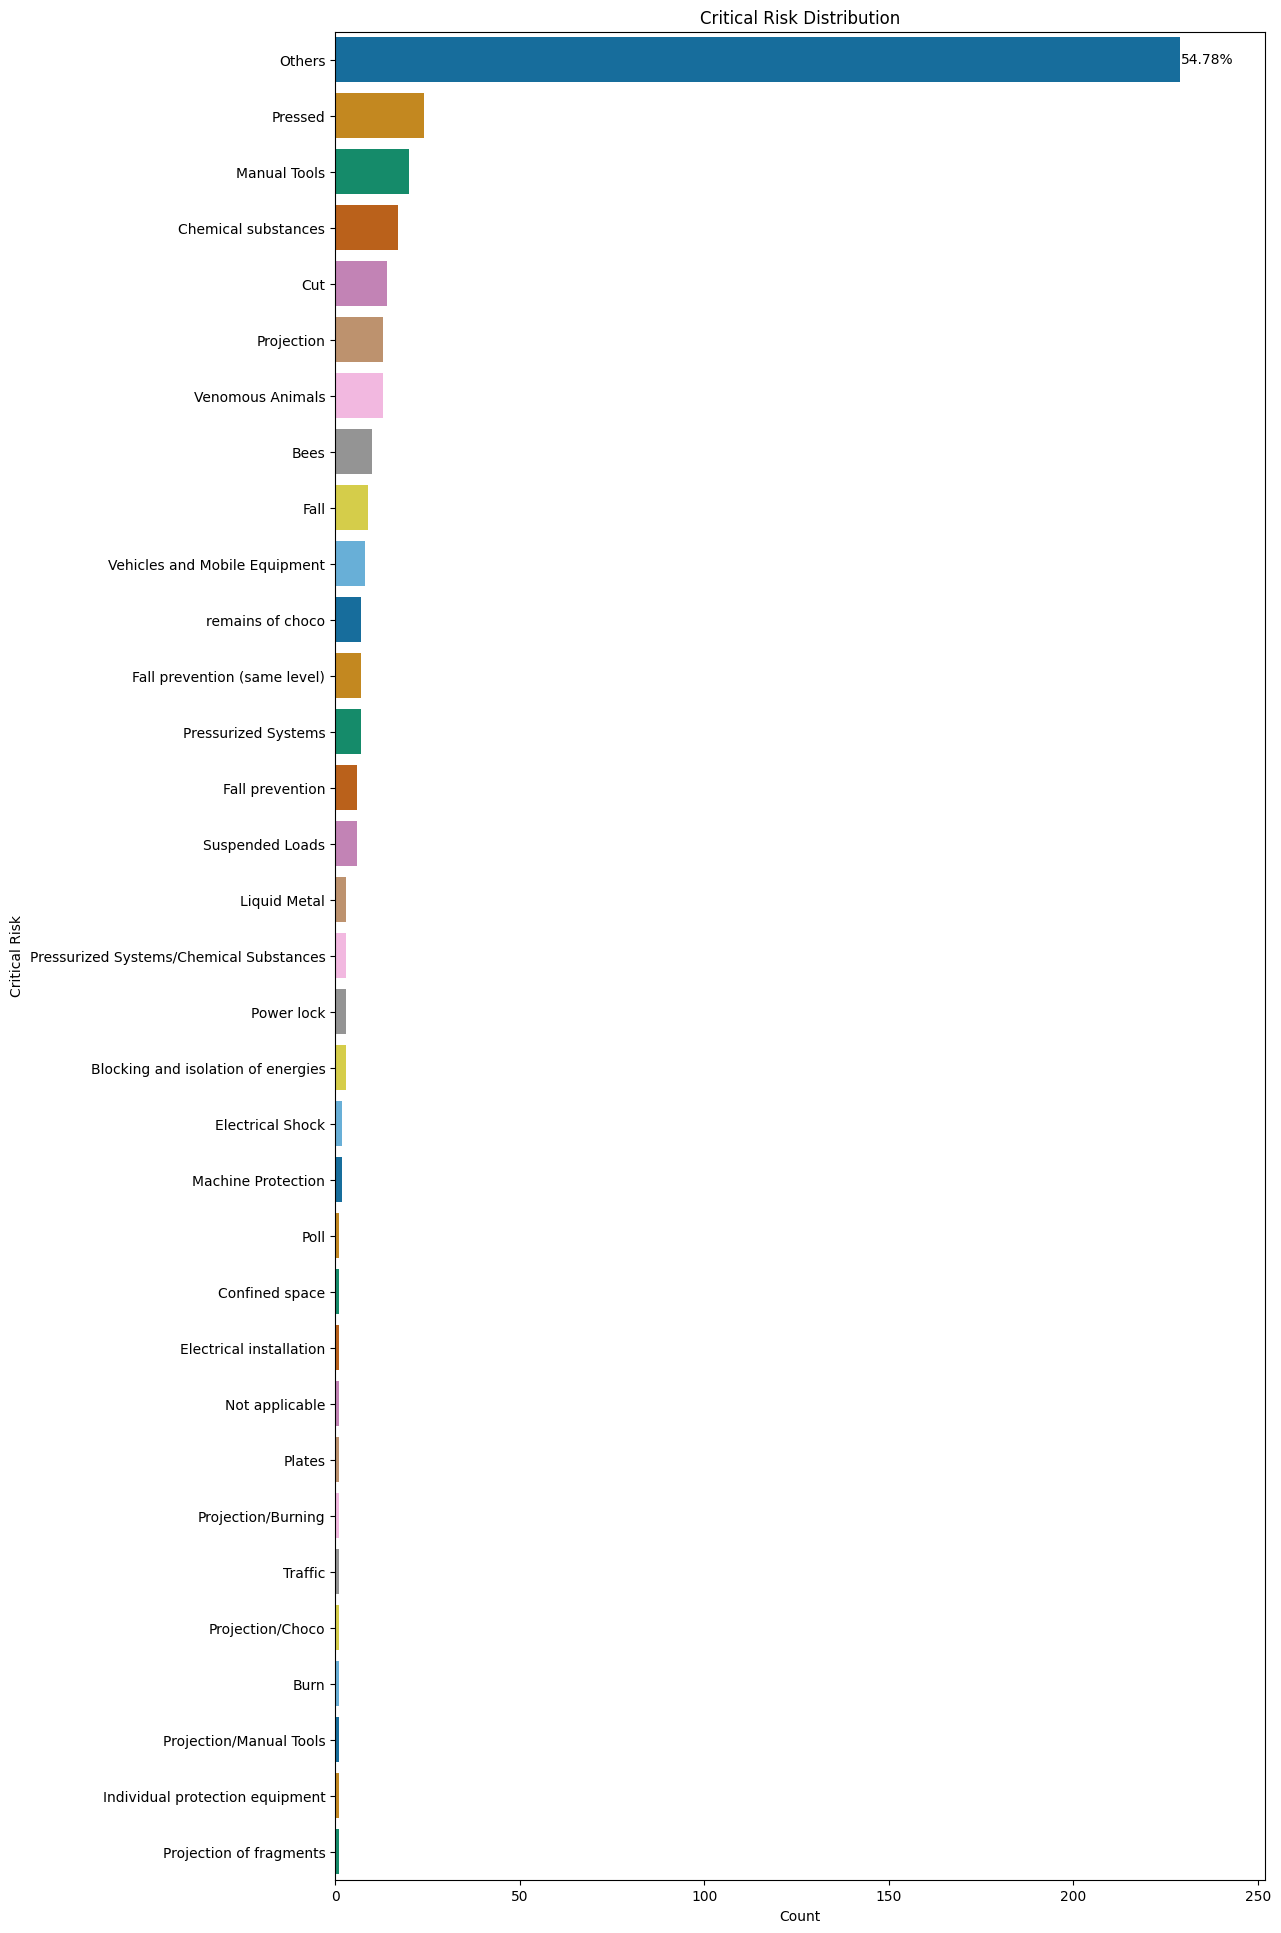

In [23]:
# Visualize ordered countPlot in transposed way since 33 values available for Critical Risk column
plt.figure(figsize=(12, 24))

ax = sns.countplot(y=data['Critical Risk'], palette='colorblind', order=data['Critical Risk'].value_counts(ascending=False).index)

# get the total count of the type column
total = data['Critical Risk'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.2f}%')

# add space at the end of the bar for the labels
ax.margins(x=0.1)

ax.set(xlabel='Count', ylabel='Critical Risk', title='Critical Risk Distribution')
plt.show()

##### Observations for `Critical Risk` values distrubtion
- Its highly biased towards value - `Others (54.78%)`. This data could have been more explored and further split during data collection or there are huge number of smaller categories coming from other industry sector(excluding Mining and Metals) , may be better to confirm with data collector.
- Specific values like - `Pressed`, `Manual Tools`, `Checmical Substances`, `Cut` have noticebale percentages in range of `5.75` to `4.07`. These might be contributor of Mining and Metals industry.

##### Distribution of `Industry Sector`

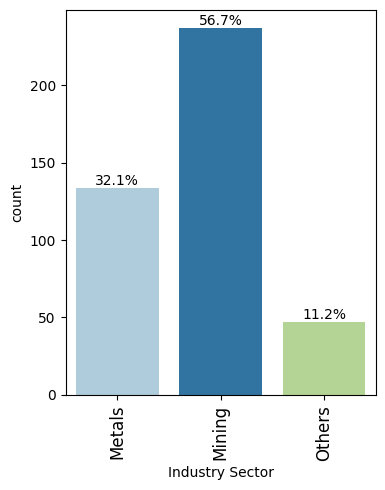

In [24]:
labeled_barplot(data, "Industry Sector", perc=True)

##### Observations for `Industry Sector` values distrubtion
- Majority of the incidents in the data are from
    - `Mining Industry Sector (56.7%)`,
    - followed by `Metals Industry Sector (32.1%)` and
    - rest of are contributed from `Others Industry Sector (11.2%)`

##### Distribution of `Gender`

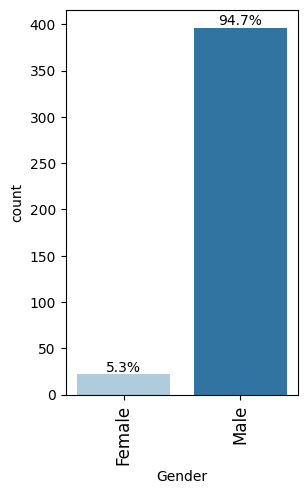

In [25]:
labeled_barplot(data, "Gender", perc=True)

##### Observations for `Gender` values distrubtion
- Count of Male involved in accidents is much higher with 94.7% compared to female accidents involvement.
- This might happen because of below factors:
    - Number of Male employees >> Number of Female employees (Risky Industry Sector)
    - Probability of Male making mistakes > Probability of Male making mistakes.

##### Distribution of `Employee Type`

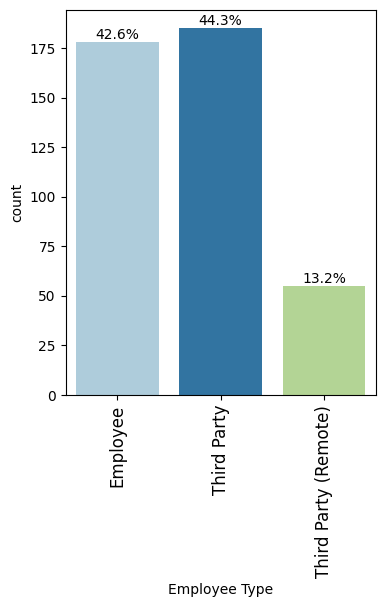

In [26]:
labeled_barplot(data, "Employee Type", perc=True)

##### Observations for `Employee Type` values distrubtion
- Third Party employees are more involved in accidents with 44.3%
- Followed by core Employee having 43.6% accident involvement
- Third Party remote employee have 13.2% accident involvement.
- Accidents involvement for Remote Employee looks significant if their overall employment percentage for companies are less compared core Employee and Third Party employee. Same for Third Party employee. This need to be investigated from overall Employee database, which is not provided here.

##### Distribution for `Country`

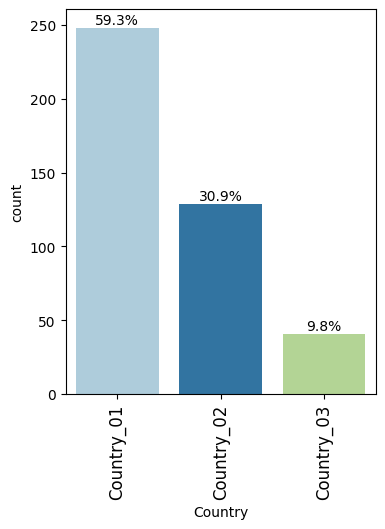

In [27]:
labeled_barplot(data, "Country", perc=True)

##### Observations for `Country` distrubtion
- Country_01 has most count of incidents with 59.3%
- Country_02 has 30.9% reported incidents.
- Country_03 has least reported incidents with 9.8%.

##### Distribution for `Locality`

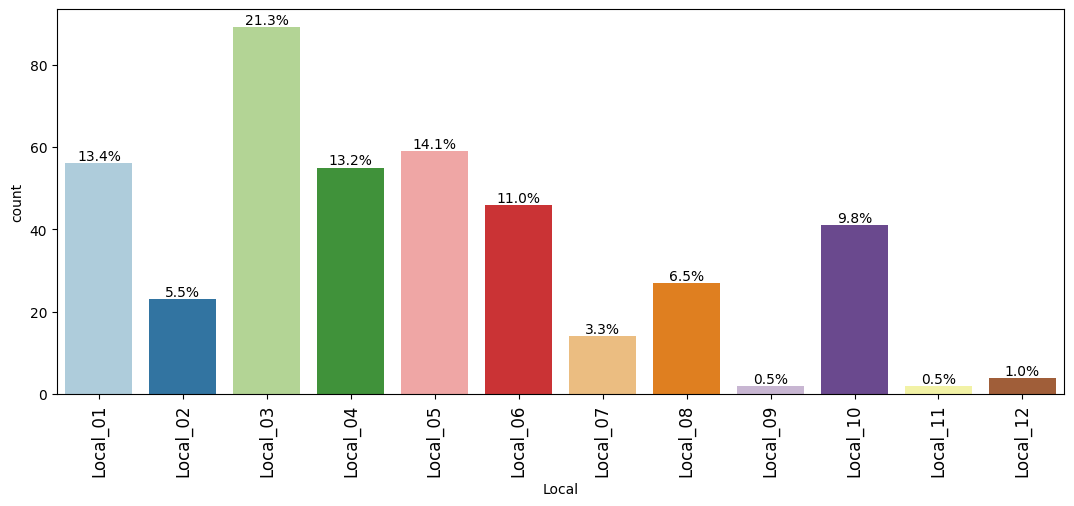

In [28]:
labeled_barplot(data, "Local", perc=True)

##### Observations for `Local` distrubtion
- With `21.3% at Local_03`, `14.1% at Local_05`, `13.4% at Local_01`, `13.2% at Local_04` and `11.0% at Local_06` are locations with most number of incidents reported.
- With `0.5% at Local_03`, `0.5% at Local_05` and `1.0% at Local_01` are locations with least number of incidents reported.

##### Distribution of extracted date columns

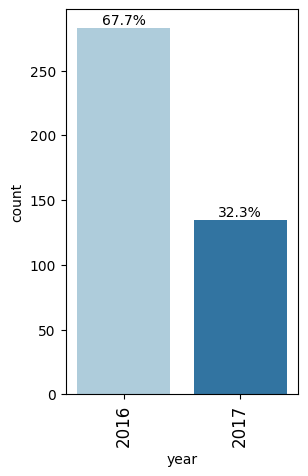

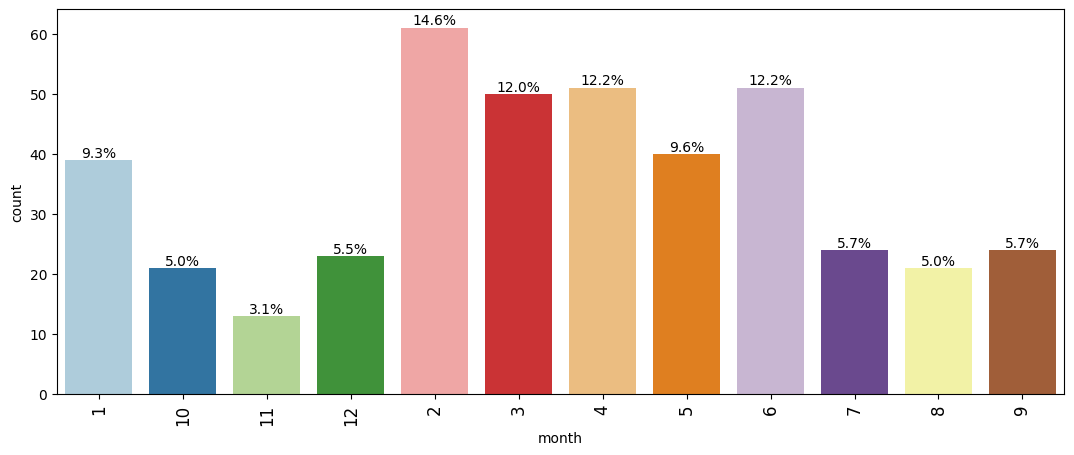

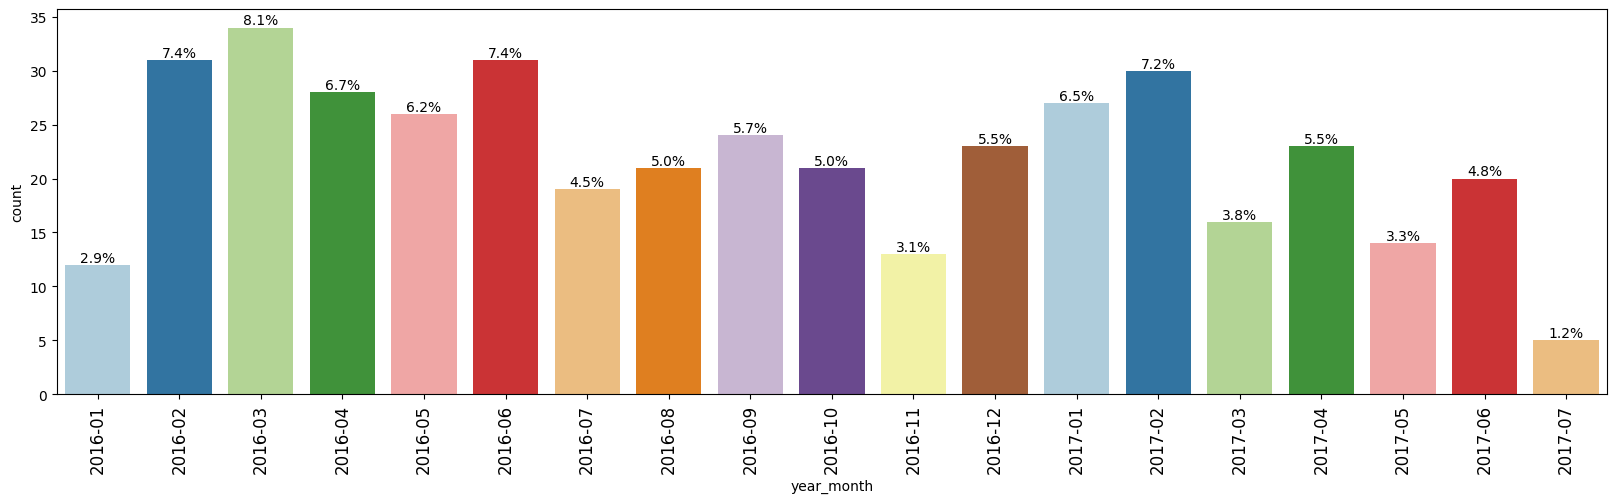

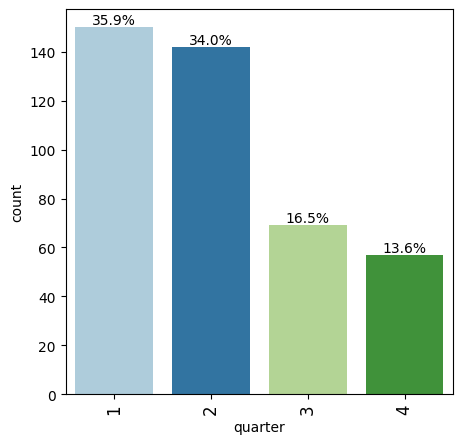

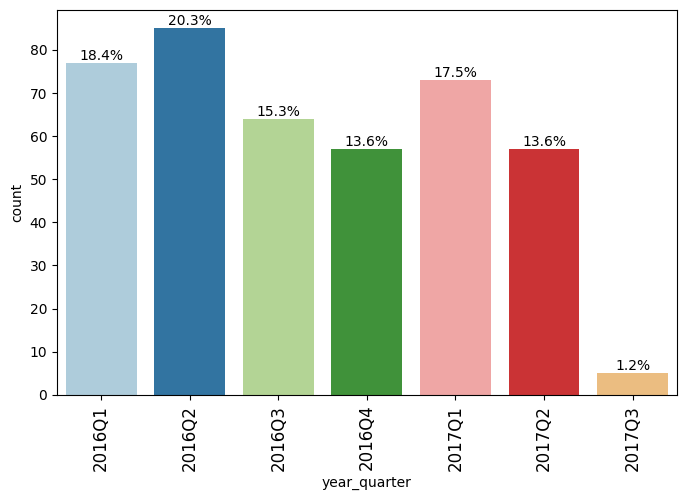

In [29]:
labeled_barplot(data, 'year', perc=True)
labeled_barplot(data, 'month', perc=True)
labeled_barplot(data, 'year_month', perc=True)
labeled_barplot(data, 'quarter', perc=True)
labeled_barplot(data, 'year_quarter', perc=True)

#### Distribution of Date column extracted in Year, Month, Quarter
- Year 2016 all months data are available but for year 2017 only 1st 7 months of data is available.
- Except for 1st Month of Year 2017 all subsequent months have reduced incident reporting when compare to months of year 2016
- Year 2016 incidents(67.7%) have reduced to 1/3rd in next year 2017(32.3%). Looks measures have been taken to improve the incidents among employees also have less months of data for year 2017.
- 1st 6 months/(1st 2 quarters) of year have 2/3rd of incidents reported and only 1/3rd are reported in last 2 quarters.
- Incident counts have decreasing trend based on increasing quarters.

#### MultiVariate Analysis using crosstab and stacked Charts for categorical columns

Country   Country_01  Country_02  Country_03
Local                                       
Local_01          56           0           0
Local_02           0          23           0
Local_03          89           0           0
Local_04          55           0           0
Local_05           0          59           0
Local_06          46           0           0
Local_07           0          14           0
Local_08           0          27           0
Local_09           0           2           0
Local_10           0           0          41
Local_11           2           0           0
Local_12           0           4           0


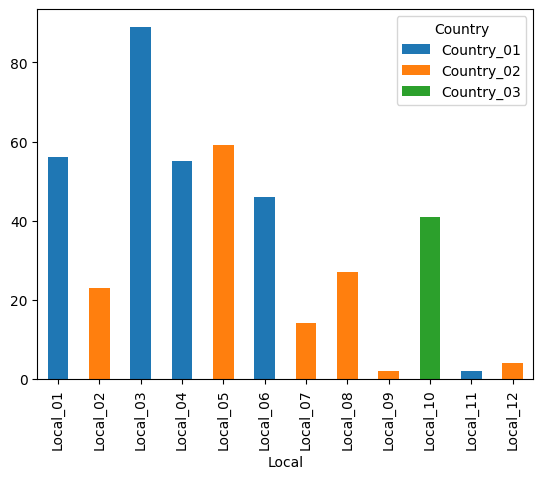

In [30]:
loc_country = pd.crosstab(data['Local'], data['Country'])
print(loc_country)
loc_country.plot.bar(stacked=True)
plt.show()

##### Observations
- Local_01, Local_03, Local_04, Local_06 and Local_11 situated in Country_01
- Local_02, Local_05, Local_07, Local_08, Local_09 and Local_12 situated in Country_02
- Only single location - Local_10 situated in Country_03
- Local_03 have highest incidents around 90.

Industry Sector  Metals  Mining  Others
Country                                
Country_01        18.55   80.65    0.81
Country_02        68.22   28.68    3.10
Country_03         0.00    0.00  100.00


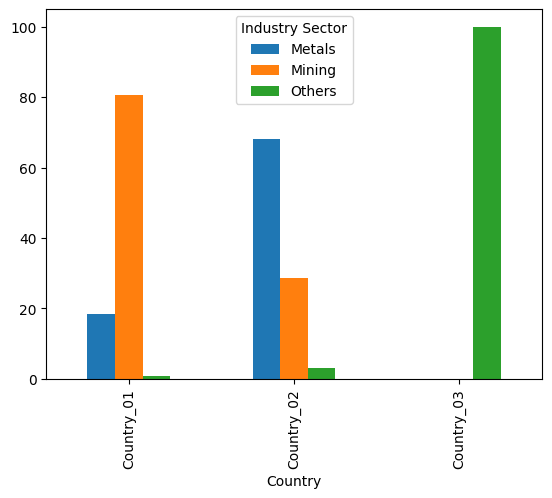

In [31]:
country_industry = pd.crosstab(data['Country'], data['Industry Sector'], normalize='index').round(4)*100
print(country_industry)
country_industry.plot.bar(stacked=False)
plt.show()

##### Observations
- `Country_03` has only `Others` sector i.e no `Mining(0%)` or `Metals(0%)` sector
- For `Country_01(0.81%)` and `Country_02(3.10%)` has minimal `Others` sector.
- For `Country_01` majority sector is `Mining(80.65%)` while for `Country_02` majority sector is `Metals(68.2%)`

##### Bivariate analysis for Accident Level and Potential Accident Level

Potential Accident Level      I     II    III     IV      V    VI
Accident Level                                                   
I                         14.56  28.48  28.80  25.24   2.91   0.0
II                         0.00  17.50  35.00  40.00   7.50   0.0
III                        0.00   0.00   9.68  83.87   6.45   0.0
IV                         0.00   0.00   0.00  70.00  30.00   0.0
V                          0.00   0.00   0.00   0.00  87.50  12.5


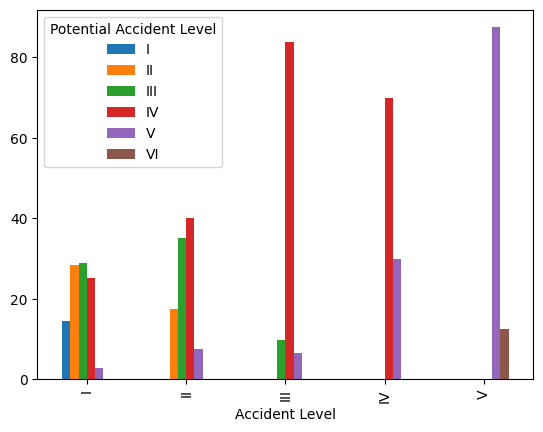

In [32]:
accLevel_potentialAccLevel = pd.crosstab(data['Accident Level'], data['Potential Accident Level'], normalize='index').round(4)*100
print(accLevel_potentialAccLevel)
accLevel_potentialAccLevel.plot.bar(stacked=False)
plt.show()

##### Observations on `Accident Level` w.r.t `Potential Accident Level`
- Only 40 `Type-I Accident Level` also have `Type-I Potential Accident Level` i.e No change in actual and potential.
- About 260+ `Type-I Accident Level` have increased `Potential Accident Level of II to IV` and `very small ~3% to Level-V`
- Most of Critical `Accidents Level of Type V` remain same in `Potential Accident Level 87.5 %` but `12.5% are moved to life threating Type VI of Potential Accident Level`

##### Bivariate analysis for `Critical Risk` and `Accident Level`

Accident Level                                I      II     III      IV      V
Critical Risk                                                                 
Bees                                     100.00    0.00    0.00    0.00   0.00
Blocking and isolation of energies       100.00    0.00    0.00    0.00   0.00
Burn                                       0.00    0.00  100.00    0.00   0.00
Chemical substances                       88.24   11.76    0.00    0.00   0.00
Confined space                           100.00    0.00    0.00    0.00   0.00
Cut                                       78.57   14.29    7.14    0.00   0.00
Electrical Shock                         100.00    0.00    0.00    0.00   0.00
Electrical installation                    0.00    0.00    0.00  100.00   0.00
Fall                                      66.67    0.00    0.00   22.22  11.11
Fall prevention                           83.33    0.00    0.00   16.67   0.00
Fall prevention (same level)              85.71    0

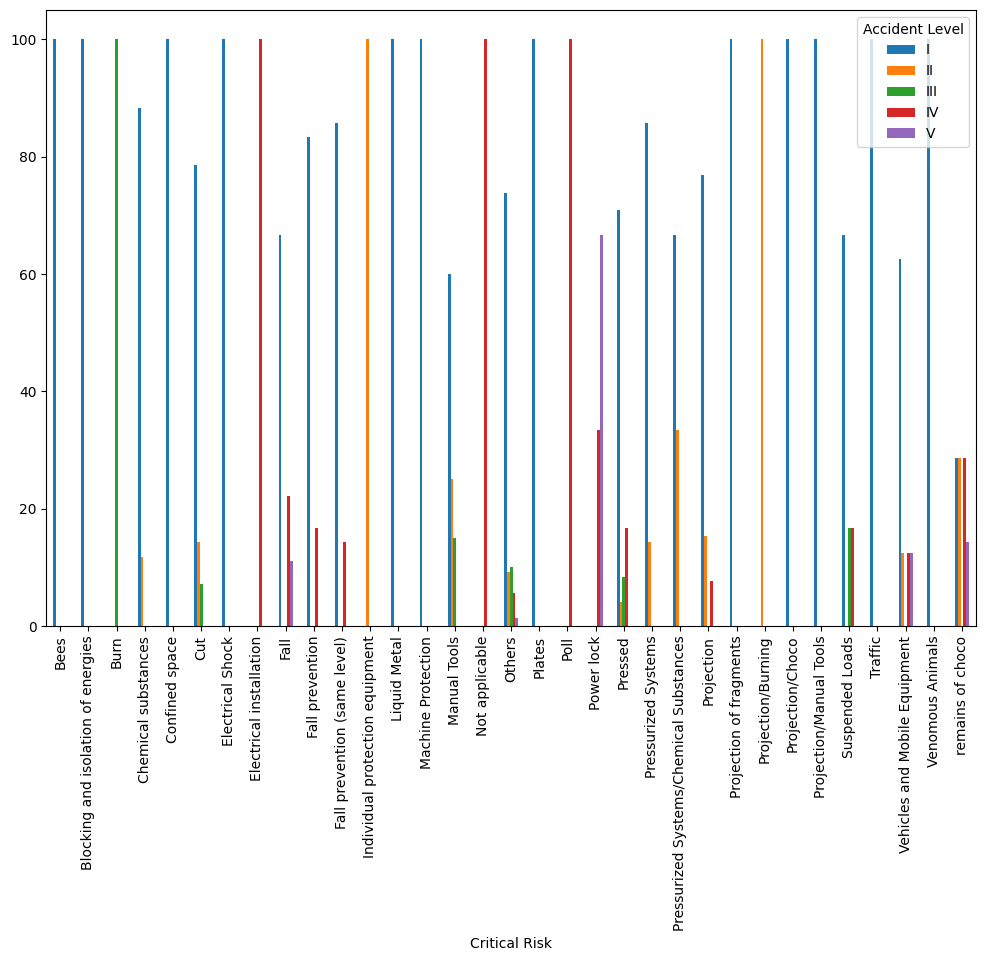

In [33]:
risk_accLevel = pd.crosstab(data['Critical Risk'], data['Accident Level'], normalize='index').round(4)*100
print(risk_accLevel)
risk_accLevel.plot.bar(stacked=False, figsize=(12, 8))
plt.show()

##### Observations for `Critical Risk` and `Accident Level`

Potential Accident Level                      I      II     III      IV  \
Critical Risk                                                             
Bees                                     100.00    0.00    0.00    0.00   
Blocking and isolation of energies         0.00   33.33   66.67    0.00   
Burn                                       0.00    0.00    0.00  100.00   
Chemical substances                        0.00   29.41   47.06   23.53   
Confined space                             0.00    0.00  100.00    0.00   
Cut                                        7.14   42.86   35.71   14.29   
Electrical Shock                           0.00    0.00    0.00  100.00   
Electrical installation                    0.00    0.00    0.00    0.00   
Fall                                      11.11   11.11   44.44   22.22   
Fall prevention                           16.67    0.00    0.00   83.33   
Fall prevention (same level)              14.29   14.29   42.86   28.57   
Individual protection equ

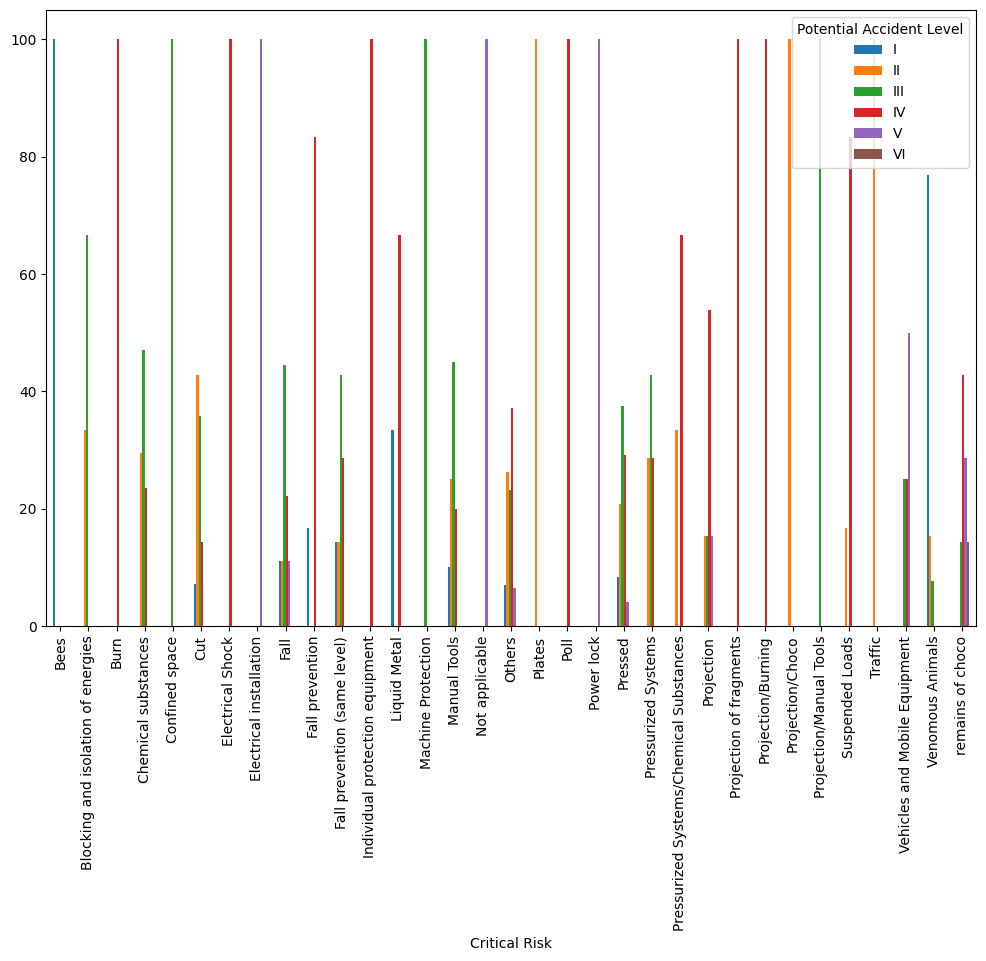

In [34]:
risk_potentialAccLevel = pd.crosstab(data['Critical Risk'], data['Potential Accident Level'], normalize='index').round(4)*100
print(risk_potentialAccLevel)
risk_potentialAccLevel.plot.bar(stacked=False, figsize=(12, 8))
plt.show()

##### Bivariate analysis for `Critical Risk` and `Potential Accident Level`

##### Observations for `Critical Risk` and `Potential Accident Level`

##### Month-Year Wise accidents analysis

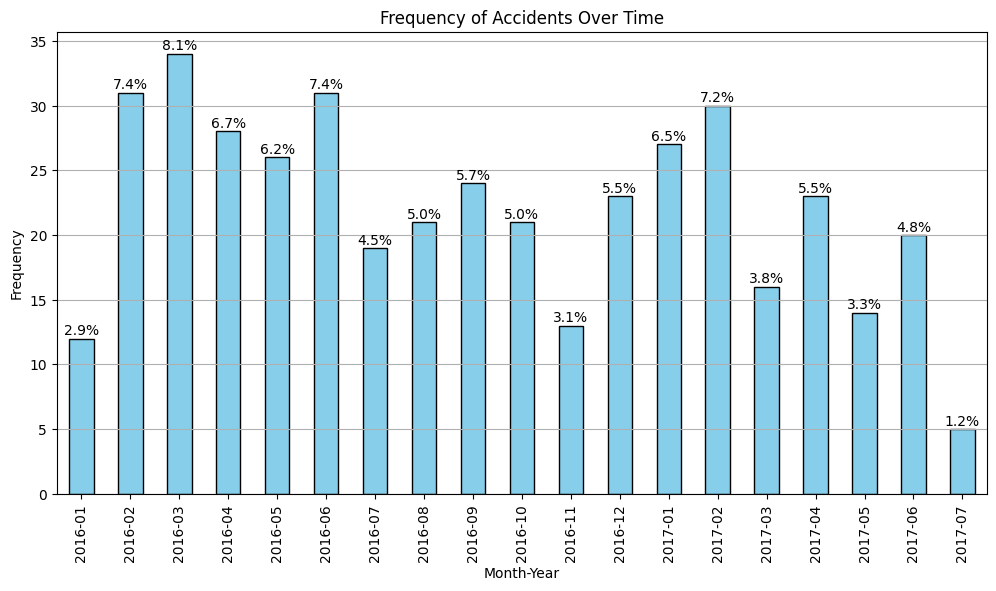

In [35]:

date_freq = data['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
bars = date_freq.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Accidents Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.grid(axis='y')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f'{height / len(data) * 100:.1f}%', ha='center')

plt.show()

In [36]:
#Function to plot Stacked-Charts for given categorical variables in the dataframe
def stacked_charts_for_multiCategoricalVar(list_ofCategorical_cols, main_col, df, gridSize):
    '''Takes -
          list_ofCategorical_cols,
          main_col,
          plots Stacked-Charts for all categorical columns with main_col.
          m = number of columns required in grid'''
    # number of categorical columns
    ncols = gridSize
    # calculate number of rows on fig
    nrows = len(list_ofCategorical_cols) // ncols + (len(list_ofCategorical_cols) % ncols > 0)
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle("Stacked-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)

    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(list_ofCategorical_cols):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        crosstable = pd.crosstab(df[main_col], df[i])
        print(f"\n Normalized CrossTab for {main_col} and {i} \n {pd.crosstab(df[main_col], df[i], normalize='index').round(4)*100}")
        crosstable.plot(kind='bar', stacked=False, ax=ax, fontsize=7)

        ax.set_title(i.upper())
        ax.set_xlabel(main_col)
        ax.set_ylabel("frequency")
    plt.show()

##### Mutivariate analysis for Accident Level


 Normalized CrossTab for Accident Level and Country 
 Country         Country_01  Country_02  Country_03
Accident Level                                    
I                    57.28       31.72       11.00
II                   47.50       47.50        5.00
III                  67.74       22.58        9.68
IV                   76.67       16.67        6.67
V                   100.00        0.00        0.00

 Normalized CrossTab for Accident Level and Industry Sector 
 Industry Sector  Metals  Mining  Others
Accident Level                         
I                 34.63   52.75   12.62
II                30.00   65.00    5.00
III               22.58   64.52   12.90
IV                23.33   70.00    6.67
V                 12.50   87.50    0.00

 Normalized CrossTab for Accident Level and Gender 
 Gender          Female    Male
Accident Level                
I                 5.83   94.17
II                7.50   92.50
III               3.23   96.77
IV                0.00  100.00
V    

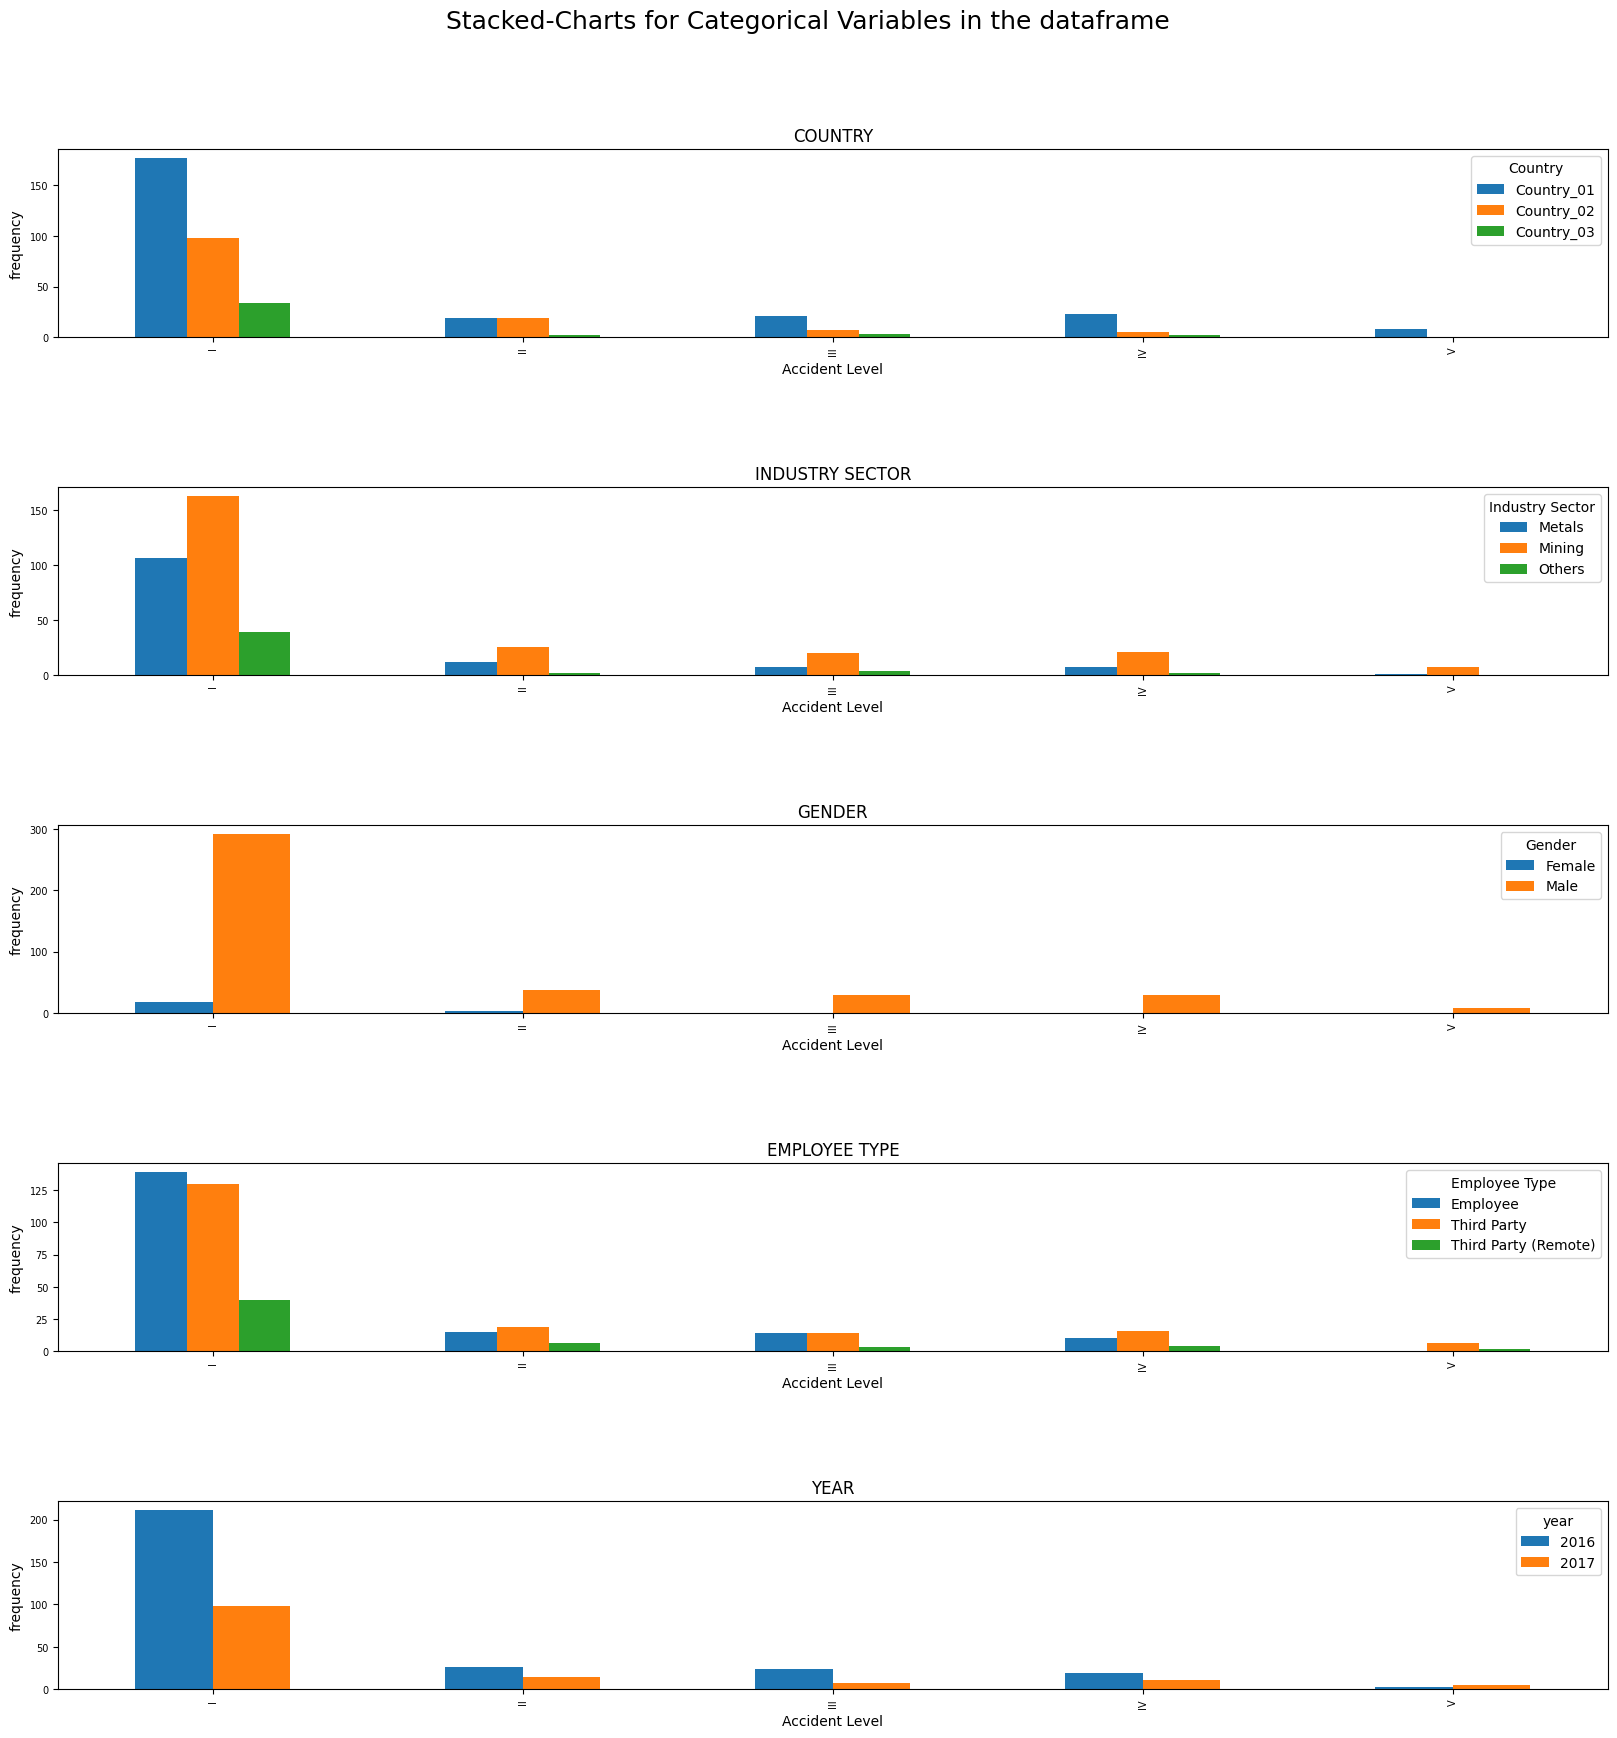

In [37]:
cols = ['Country', 'Industry Sector', 'Gender', 'Employee Type', 'year']
stacked_charts_for_multiCategoricalVar(cols, 'Accident Level', data, 1)

##### Observations on `Accident Level` w.r.t `Country`, `Industry Sector`, `Gender`, `Employee Type` and `year`

1. Country Wise

2. Sector Wise

3. Gender Wise

4. Employee Types Wise

##### Mutivariate analysis for `Potential Accident Level`


 Normalized CrossTab for Potential Accident Level and Country 
 Country                   Country_01  Country_02  Country_03
Potential Accident Level                                    
I                              22.22       13.33       64.44
II                             53.68       42.11        4.21
III                            60.38       38.68        0.94
IV                             71.63       23.40        4.96
V                              70.00       30.00        0.00
VI                            100.00        0.00        0.00

 Normalized CrossTab for Potential Accident Level and Industry Sector 
 Industry Sector           Metals  Mining  Others
Potential Accident Level                        
I                          15.56   17.78   66.67
II                         50.53   42.11    7.37
III                        41.51   57.55    0.94
IV                         23.40   70.21    6.38
V                           6.67   93.33    0.00
VI                          0.0

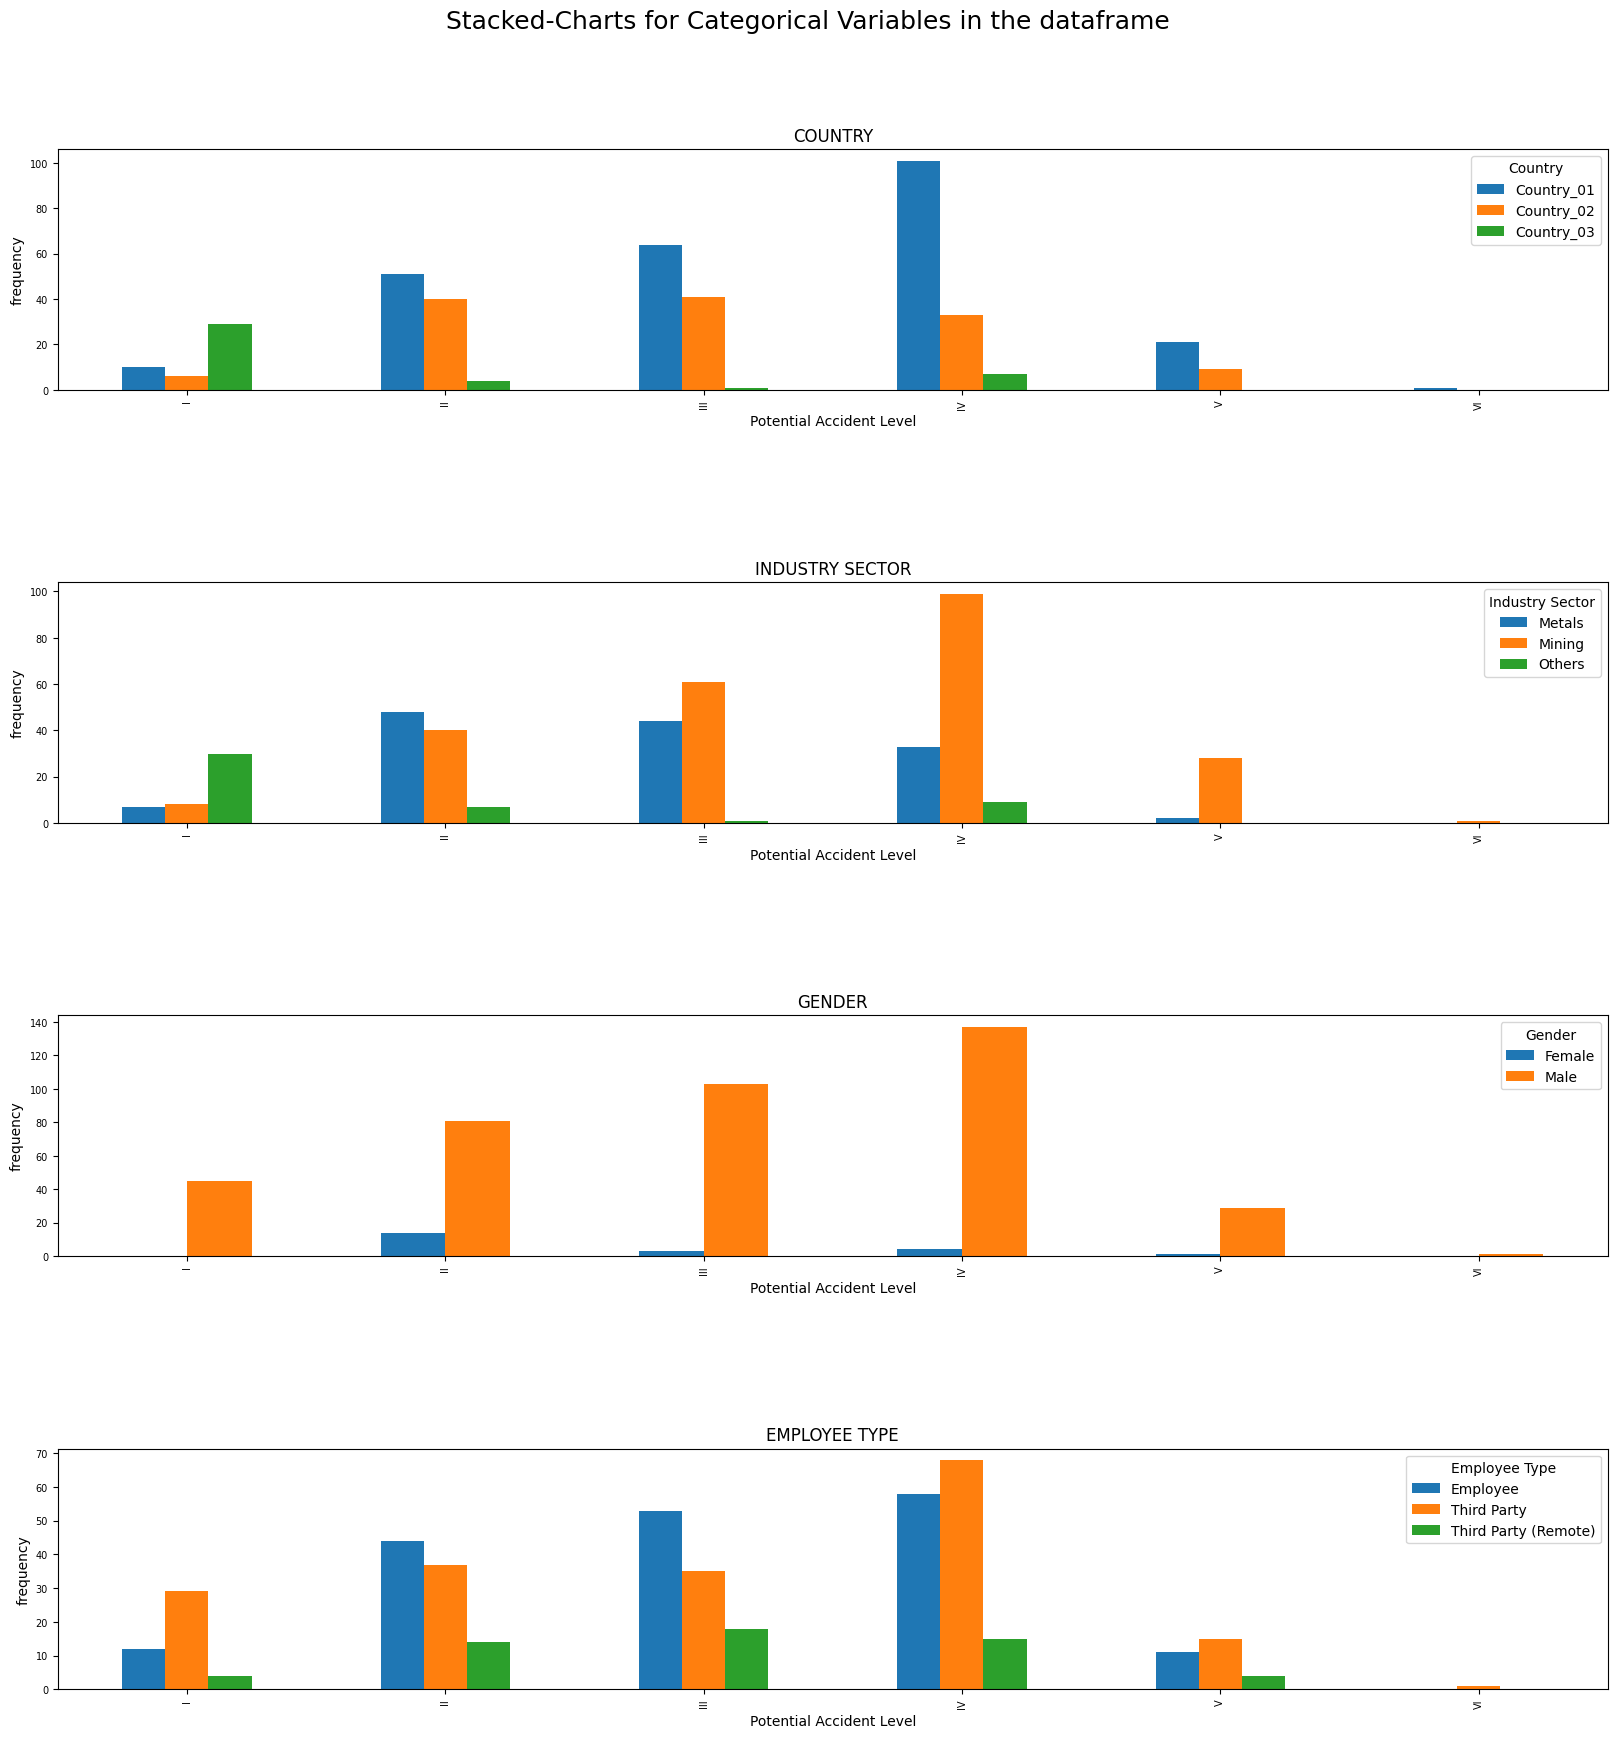

In [38]:
cols = ['Country', 'Industry Sector', 'Gender', 'Employee Type']
stacked_charts_for_multiCategoricalVar(cols, 'Potential Accident Level', data, 1)

##### Observations on `Accident Level` w.r.t `Country`, `Industry Sector`, `Gender`, `Employee Type` and `year`

##### Mutivariate analysis for `Gender` w.r.t `Industry Sector`, `Employee Type` , `Country` and `Location`


 Normalized CrossTab for Gender and Industry Sector 
 Industry Sector  Metals  Mining  Others
Gender                                 
Female            59.09   22.73   18.18
Male              30.56   58.59   10.86

 Normalized CrossTab for Gender and Employee Type 
 Employee Type  Employee  Third Party  Third Party (Remote)
Gender                                                    
Female            36.36        40.91                 22.73
Male              42.93        44.44                 12.63

 Normalized CrossTab for Gender and Country 
 Country  Country_01  Country_02  Country_03
Gender                                     
Female        31.82       68.18        0.00
Male          60.86       28.79       10.35

 Normalized CrossTab for Gender and Local 
 Local   Local_01  Local_02  Local_03  Local_04  Local_05  Local_06  Local_07  \
Gender                                                                         
Female      0.00      0.00     13.64      4.55     31.82      9.09  

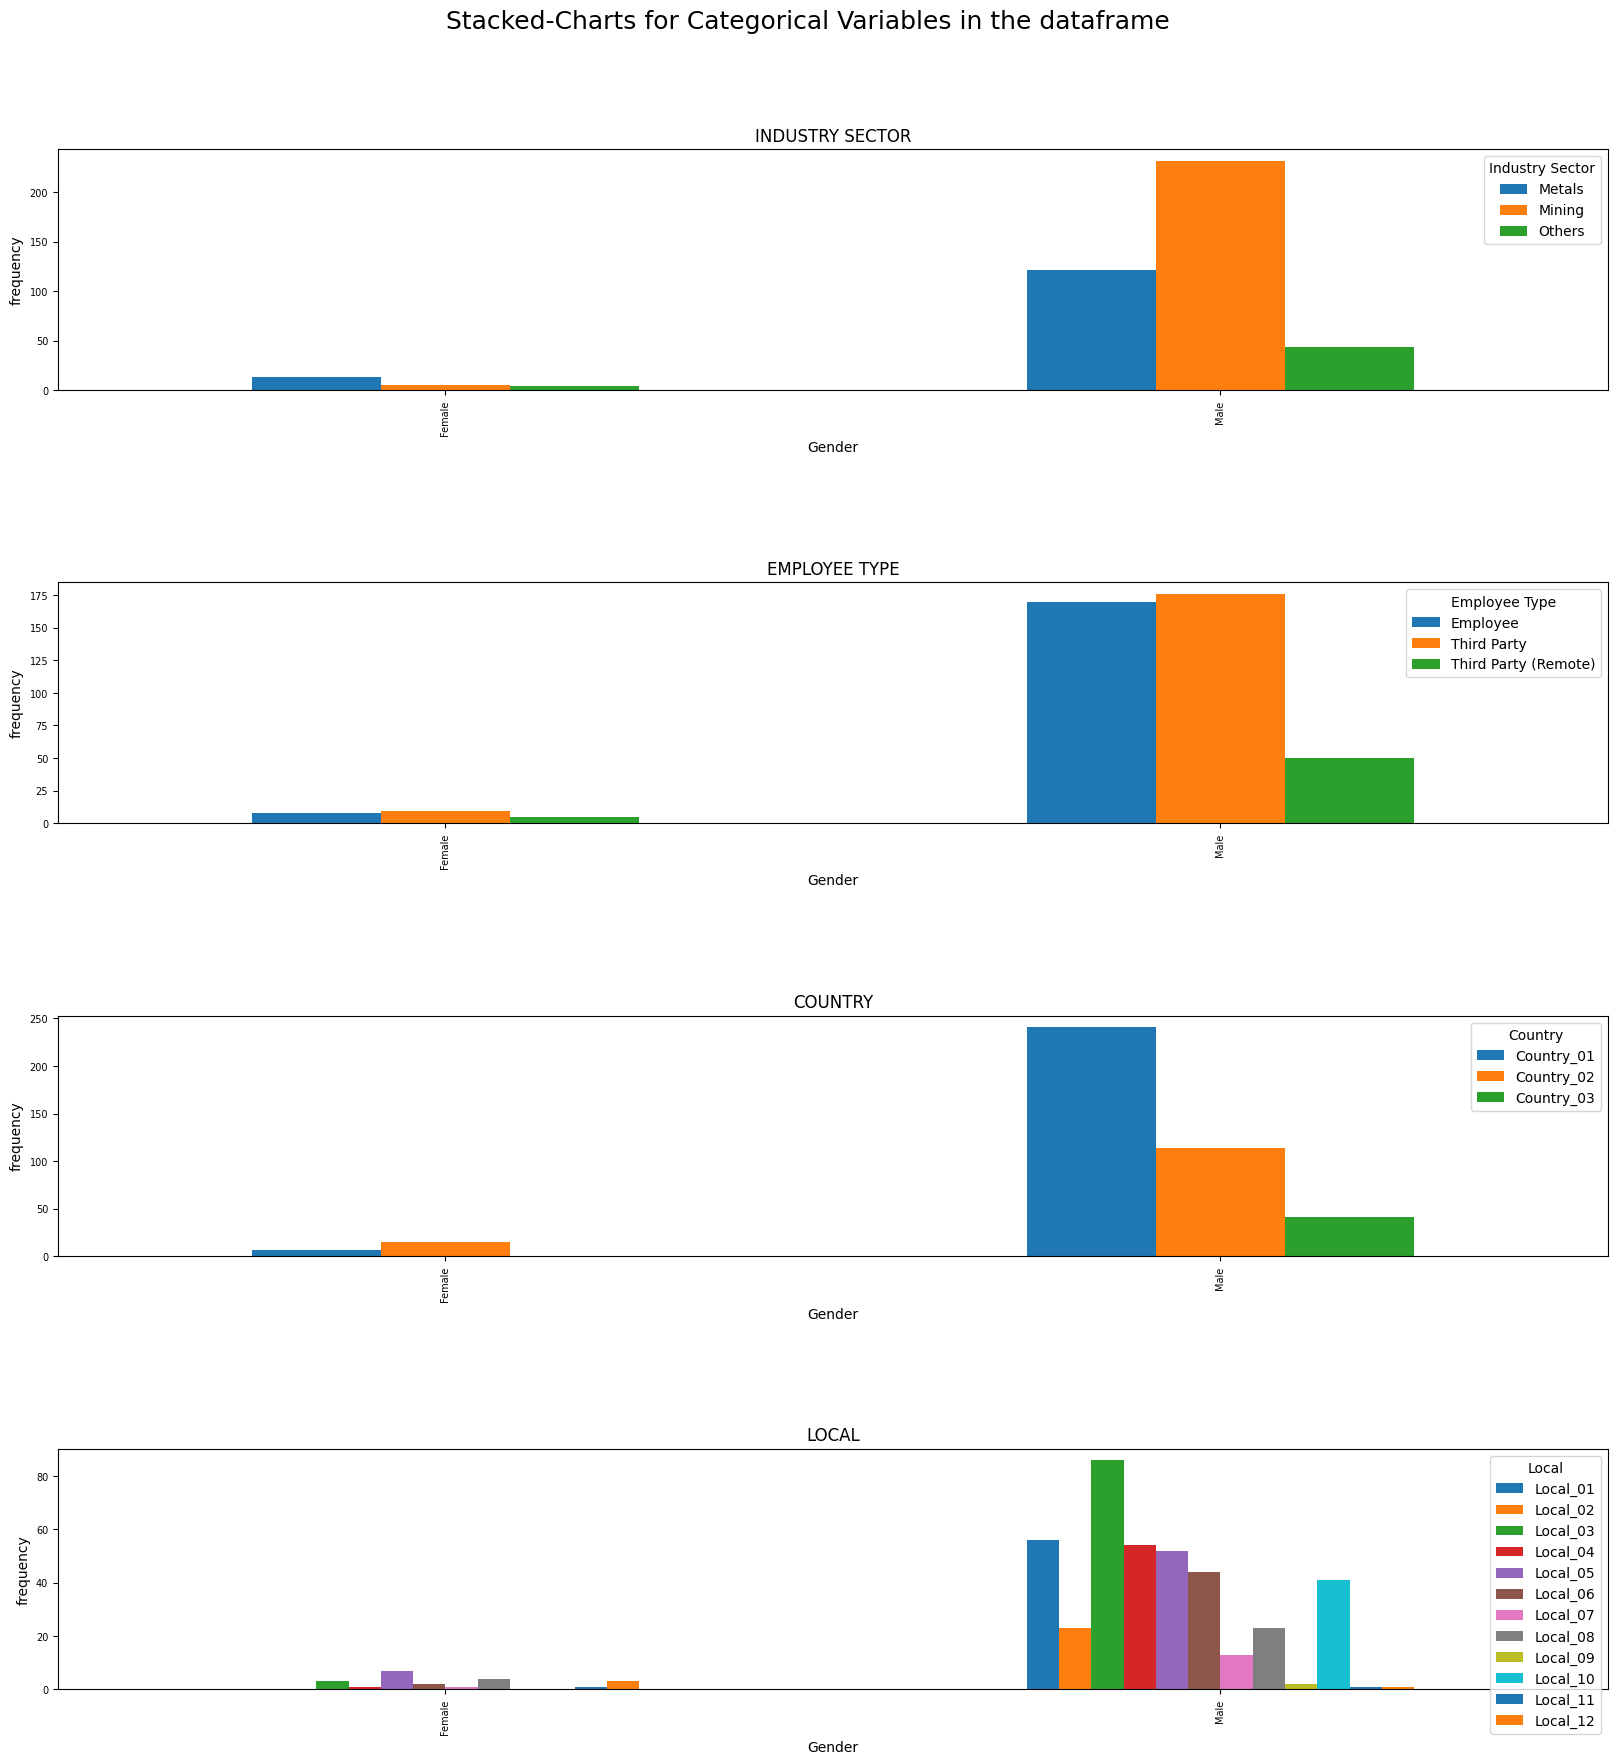

In [39]:
cols = ['Industry Sector','Employee Type', 'Country', 'Local']
stacked_charts_for_multiCategoricalVar(cols, 'Gender', data, 1)

#####Observations for Gender w.r.t Industry Sector, Employee Type , Country and Location

Mutivariate analysis for Industry Sector w.r.t Gender, Employee Type , Country and Location


 Normalized CrossTab for Industry Sector and Gender 
 Gender           Female   Male
Industry Sector               
Metals             9.70  90.30
Mining             2.11  97.89
Others             8.51  91.49

 Normalized CrossTab for Industry Sector and Employee Type 
 Employee Type    Employee  Third Party  Third Party (Remote)
Industry Sector                                             
Metals              56.72        23.13                 20.15
Mining              37.55        50.63                 11.81
Others              27.66        72.34                  0.00

 Normalized CrossTab for Industry Sector and Country 
 Country          Country_01  Country_02  Country_03
Industry Sector                                    
Metals                34.33       65.67        0.00
Mining                84.39       15.61        0.00
Others                 4.26        8.51       87.23

 Normalized CrossTab for Industry Sector and Local 
 Local            Local_01  Local_02  Local_03  Local_

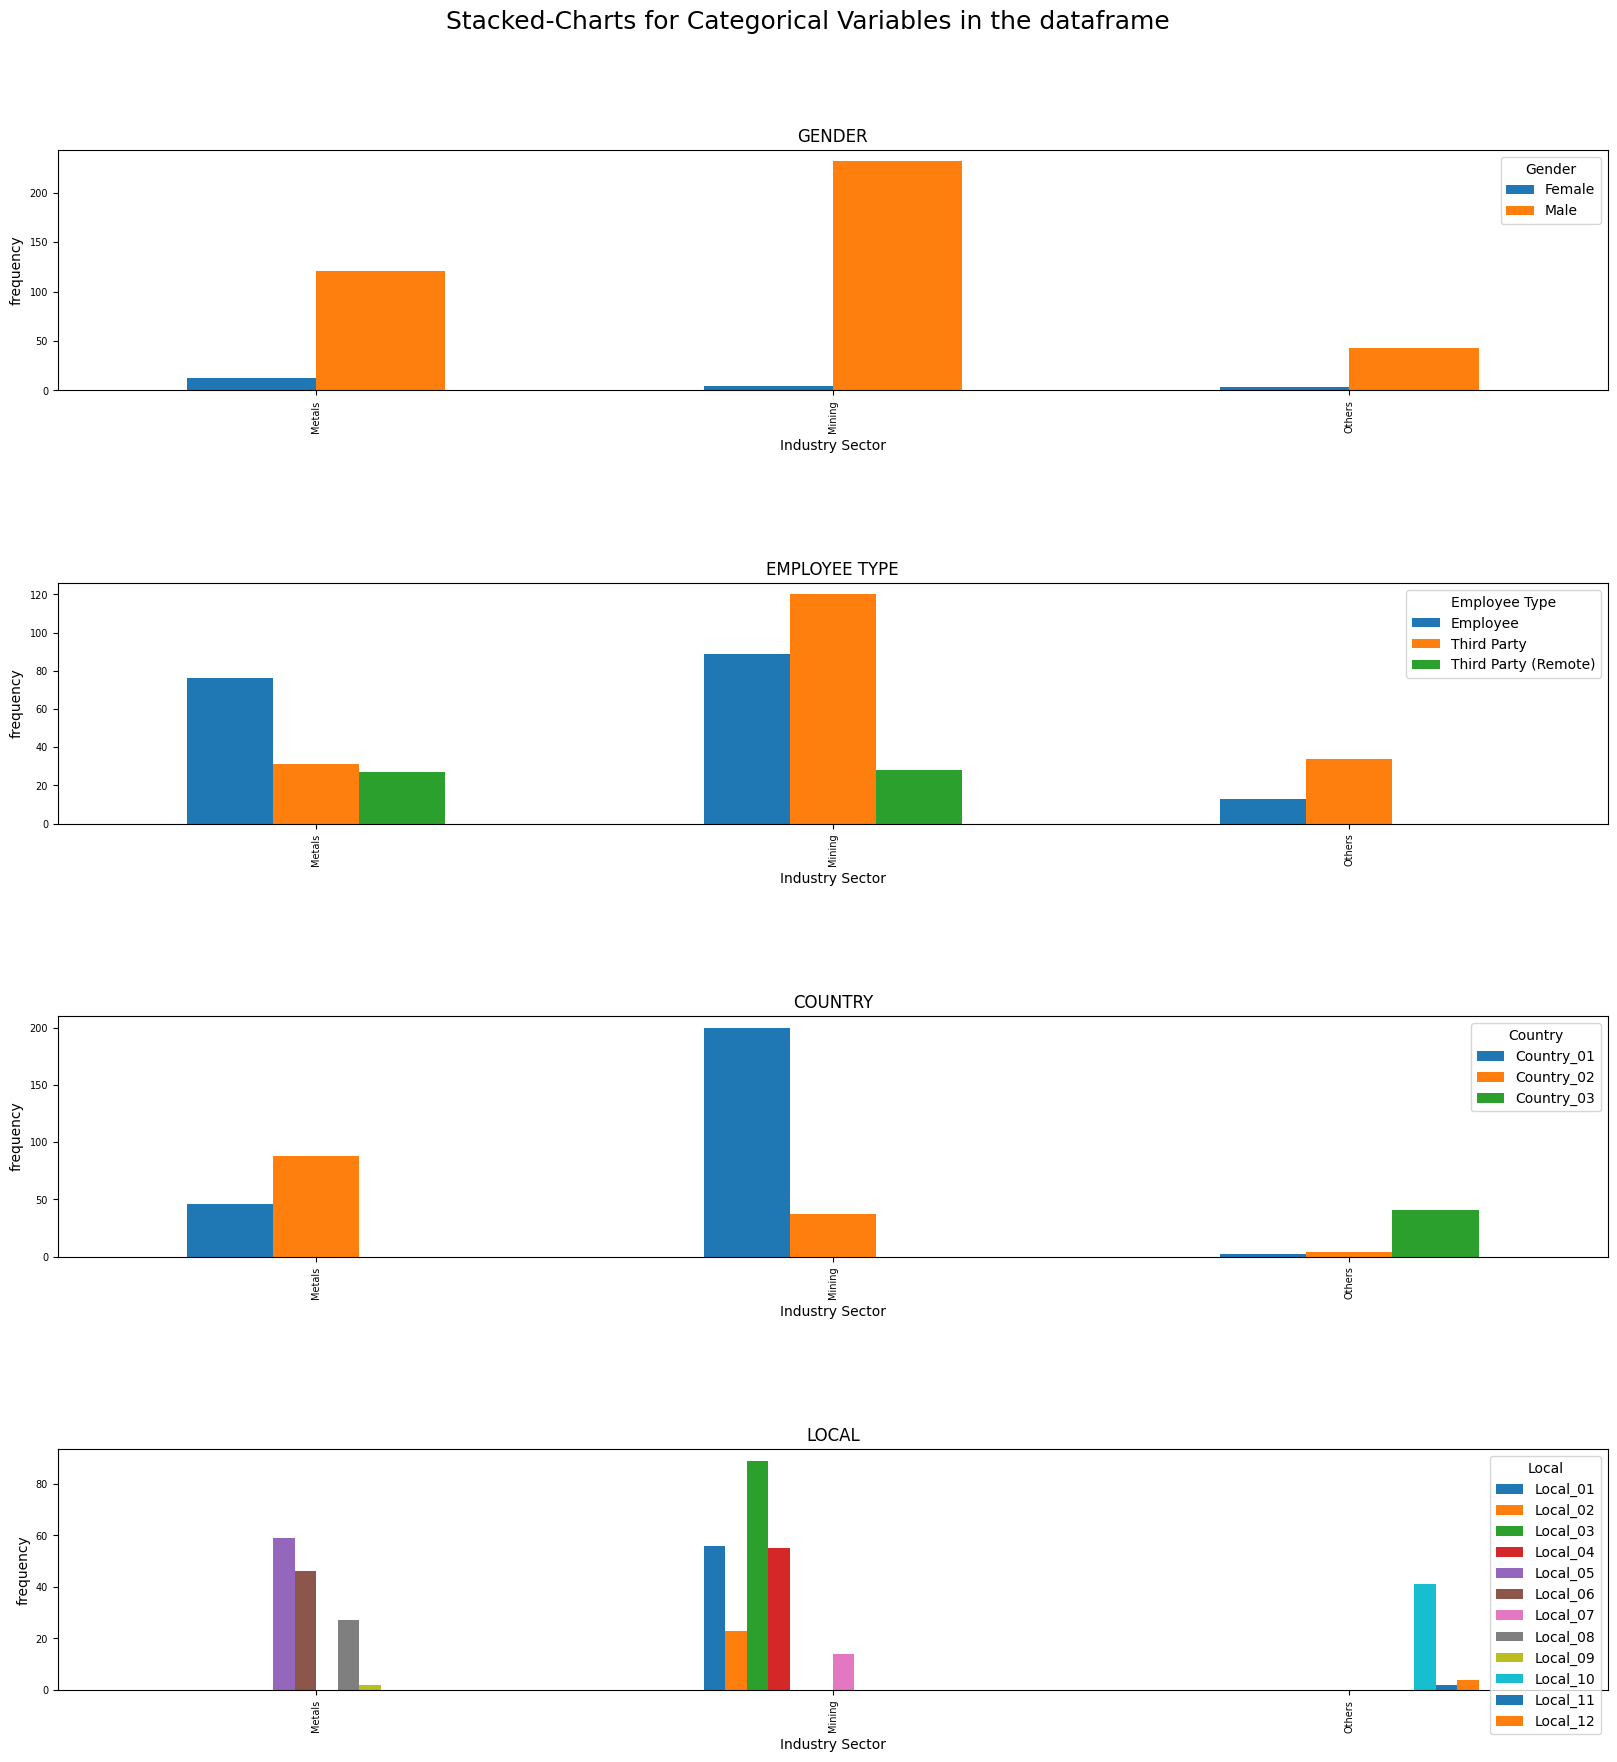

In [40]:
cols = ['Gender','Employee Type', 'Country', 'Local']
stacked_charts_for_multiCategoricalVar(cols, 'Industry Sector', data, 1)

##### Observations for Industry Sector w.r.t Gender, Employee Type , Country and Location

### Summary of steps performed during data cleaning and EDA on non-textual column

- dropping the identifier column from data as it won't be adding any value in analysis
- Renaming meaningful column headers looks typos in data collection
- Checking for missing values
- Checking for duplicate values
- Converting date field as categorical columns - year, month, year-quarter and year-month
- Checking the statistical summary
- Checking unique values for columns
- Renaming values for Critical Risk
- Exploratory Data Analysis (Non text columns - except `Description Column`)
	- Univariate Analysis
		- Plot and Observations for:
      - `Accident Level`
      - `Potential Accident Level`
      - `Critical Risk`
      - `Industry Sector`
      - `Gender`
      - `Employee Type`
      - `Country`
      - `Locality`
      - `Extracted date columns`
    - Bivariate Analysis using crosstab and stacked Charts for categorical columns
      - `Country` and `Local`
      - `Country` and `Industry Sector`
      - `Accident Level` and `Potential Accident Level`
      - `Critical Risk` and `Accident Level`
      - `Critical Risk` and `Potential Accident Level`
    - Multivariate Analysis using crosstab and stacked Charts for categorical columns
      - 'Accident Level' and ['','','']
      - 'Accident Level' and ['','','']
      - 'Accident Level' and ['','','']
      - 'Accident Level' and ['','','']
      - 'Accident Level' and ['','','']     


## Step 3: Data preprocessing (NLP Preprocessing techniques)

### Preprocessing the textual column

In [41]:
dataset = data.copy()

In [42]:
set_stopWords = stopwords.words('english')

In [43]:
#adding these as during preprocessing numbers will be deleted
#So associated units and common suffix-prefix words should also be deleted
set_stopWords.extend(['a.m','p.m', 'am', 'pm', 'cm','kg', 'meters', 'mx', 'ppm', 'litre', 'ml', 'cc', 'nv', 'cx', 'approx', 'approximately'])

In [44]:
# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

In [45]:
def preprocess_text(text):
    # Expand the contarctions like : i've -> I have
    #using contractions library from https://pypi.org/project/pycontractions/

    text = contractions.fix(text)

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in set_stopWords])

    # Applying the WordNet Lemmetizer on every word of a message and joining the lemmetized words back into a single string
    text = ' '.join(lemmatize_tokens(text.split()))

    return text

In [46]:
dataset['Cleaned Description'] = dataset['Description'].apply(preprocess_text)

In [47]:
dataset.sample(4)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,year,month,day,year_month,quarter,year_quarter,Cleaned Description
86,2016-04-11,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,"Once the RB machine is lifted (weight 7 tn) at 15 cm from the floor level, the accidently proceeds to pull the RB machine with a key of 5 tons (maximum cap), to lay it on the floor, after advancing 70 cm horizontally, the anchor bolt (pig tail type, 5/8 ""diameter) to which the key was hooked, it breaks transversely, and with the pulling force, this key is projected onto the injured person's left shoulder causing the injury. - The injured was 1.50 meters from the key. - At the time of the incident, the assistant was 5 meters away doing order and cleaning",2016,4,11,2016-04,2,2016Q2,rb machine lift weight tn floor level accidently proceeds pull rb machine key ton maximum cap lay floor advance horizontally anchor bolt pig tail type diameter key hooked break transversely pull force key project onto injured person left shoulder cause injury injured key time incident assistant away order cleaning
153,2016-06-17,Country_02,Local_08,Metals,IV,V,Male,Employee,Not applicable,"At approximately 5:45 pm, the operator Paulo (operator of the filters) informed the autoclave operator via radio of a leak on the side of the scruber. The autoclave III feed was stopped by the control and officials Georli and Renato initiated the procedures for closing the autoclave transfer valve for flash TQs. Soon after, there was a break in the chicken, projecting pulp hot and reaching three employees who were inside the room near the equipment.",2016,6,17,2016-06,2,2016Q2,operator paulo operator filter inform autoclave operator via radio leak side scruber autoclave iii feed stop control official georli renato initiate procedure closing autoclave transfer valve flash tqs soon break chicken project pulp hot reach three employee inside room near equipment
206,2016-09-04,Country_01,Local_06,Metals,IV,IV,Male,Employee,Suspended Loads,"In section 75 in row 12 Cell 36, the worker performs anode lifting to correct short circuit, using the auxiliary hoist and nylon sling, at which time the sling is released from the anode and hits the back of the right hand causing it the injury. Worker is seen in the Medical and transferred to a clinic for external evaluation.",2016,9,4,2016-09,3,2016Q3,section row cell worker performs anode lift correct short circuit use auxiliary hoist nylon sling time sling release anode hit back right hand cause injury worker see medical transfer clinic external evaluation
252,2016-11-19,Country_01,Local_04,Mining,III,IV,Male,Third Party,Others,"The workers: César (injured) and Nilton receive the order of their immediate supervisor Román to carry out the assembly activity of a brace (length 4.60 m, approximate weight 50 Kg) of the structure of the Nro belt. 2, said collaborators lift the brace and approach it to the installation point, leaving one end on the ground and the other resting on the corner of the pedestal (approximate height of 40 cm). After carrying out the planning of the work, the injured person lifts the end part that was on the floor to turn and position it for assembly, at that moment the other end falls generating the imprisonment of the fingers of the left hand. Staff is taken to the medical center by the supervisor.",2016,11,19,2016-11,4,2016Q4,worker csar injured nilton receive order immediate supervisor romn carry assembly activity brace length approximate weight structure nro belt say collaborator lift brace approach installation point leave one end ground rest corner pedestal approximate height carry planning work injured person lift end part floor turn position assembly moment end fall generate imprisonment finger left hand staff take medical center supervisor


### EDA on NLP PreProcessed Data
- Identifying max lines/word
- Plotting WordCloud
- Creating countplots for n-grams
    - Unigram
    - BiGrams
    - TriGrams
- Observations on WordCloud and n-grams plots

In [48]:
# Get length of each line in terms of characters including spaces
dataset['line_length'] = dataset['Cleaned Description'].str.len()

# Get length of each line in terms of words
dataset['nb_words'] = dataset['Cleaned Description'].apply(lambda x: len(x.split(' ')))

min_line_length = dataset['line_length'].min()
max_line_length = dataset['line_length'].max()
min_word_line = dataset['nb_words'].min()
max_word_line = dataset['nb_words'].max()
splitedAllWordsAsText = " ".join(dataset['Cleaned Description'].values)

print('Minimum line length: {}\n'.format(min_line_length))
print('\nMaximum line length: {}\n'.format(max_line_length))
print('\nMinimum number of words: {}\n'.format(min_word_line))
print('\nMaximum number of words: {}\n'.format(max_word_line))

print('\nLine with maximum length: {}\n'.format(dataset[dataset['line_length'] == dataset['line_length'].max()]['Cleaned Description'].values[0]))
print('\nLine with minimum length: {}\n'.format(dataset[dataset['line_length'] == dataset['line_length'].min()]['Cleaned Description'].values[0]))
print('\nLine with maximum number of words: {}\n'.format(dataset[dataset['nb_words'] == dataset['nb_words'].max()]['Cleaned Description'].values[0]))
print('\nLine with minimum number of words: {}\n'.format(dataset[dataset['nb_words'] == dataset['nb_words'].min()]['Cleaned Description'].values[0]))

dataset = dataset.drop('line_length', axis=1)
dataset = dataset.drop('nb_words', axis=1)

Minimum line length: 57


Maximum line length: 636


Minimum number of words: 9


Maximum number of words: 94


Line with maximum length: level gallery hold activity bolter equipment operator performs drilling first hole support right gable footdeep drill end drill rod break leave thread inside drilling machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enters corrugate iron central hole rest bar embed shank generate pressure moment operator activates percussion generates movement shank hit palm victim left hand generate described injury worker wear safety glove time accident end corrugate iron contact left hand shape like cane worker time accident position roof support mesh split set


Line with minimum length: ignite furnace battery reflux hot gas reach face employee


Line with maximum number of words: perform sleeve removal maneuver hole deep general da silva press one side lock nut rod together jack h

#### Overall Text Cloud

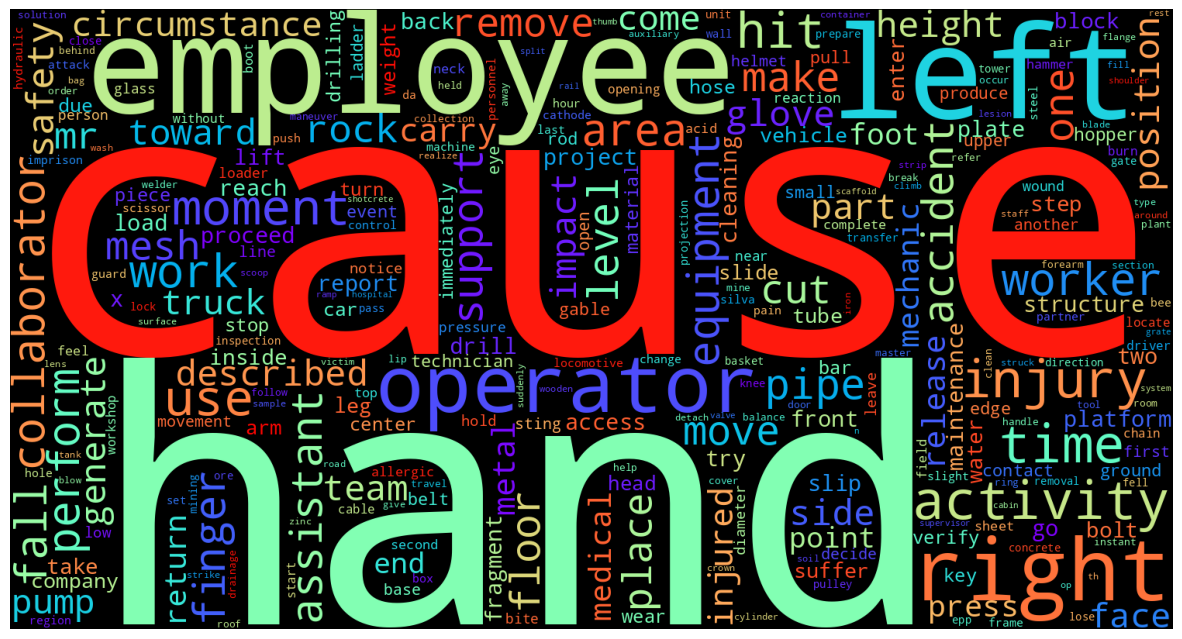

In [49]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(splitedAllWordsAsText)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [50]:
'''
 df : dataFrame to Use
 textCol : textual column from df
 targetCol : targetColumn for specific Values joining
 values : values list from targetCol against which word cloud will be rendered for each values in loop
'''
def wordCloudByColAndValues(df, textCol, targetCol, values):
    for val in values:
      plt_title = targetCol + ' - ' + val
      casesByVal = df[df[targetCol] == val]
      words = ' '.join(casesByVal[textCol])
      cleaned_word = " ".join([word for word in words.split()])
      wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'black', colormap='rainbow', max_words=200, width = 800, height = 600).generate(cleaned_word)
      list_keys = []
      for items in wordcloud.words_:
       list_keys.append(items)
      print(f'Top 30 words for:{plt_title}\n{list_keys[:10]}')
      print(list_keys[10:20])
      print(list_keys[20:30])
      print(f'\n WordCloud FOR: {plt_title}\n')
      plt.figure(figsize=(15, 10))
      plt.title(plt_title)
      plt.imshow(wordcloud)
      plt.axis('off')
      plt.show()

#### WordCloud for all Values of `Accident Level`

In [51]:
wordCloudByColAndValues(dataset, 'Cleaned Description', 'Accident Level', ['I','II','III','IV','V'])

Output hidden; open in https://colab.research.google.com to view.

#### WordCloud for all Values of `Potential Accident Level`

In [52]:
wordCloudByColAndValues(dataset, 'Cleaned Description', 'Potential Accident Level', ['I','II','III','IV','V', 'VI'])

Output hidden; open in https://colab.research.google.com to view.

#### Observations for Top 30 Words based on Worcloud
- Accident Level
 - Level - I
   - ['employee', 'activity', 'operator', 'hit', 'area', 'moment', 'collaborator', 'cause', 'work', 'assistant', 'equipment', 'level', 'use', 'one', 'right', 'worker', 'fall', 'make', 'pipe', 'cut', 'floor', 'time accident', 'perform', 'right hand', 'left hand', 'mesh', 'remove', 'support', 'move', 'position']
 - Level - II
   - ['employee', 'cause', 'use', 'right', 'pipe', 'finger', 'cut', 'hit', 'come', 'face', 'move', 'release', 'operator', 'bolt', 'worker', 'place', 'time', 'hand', 'press', 'circumstance', 'make', 'left', 'area', 'activity', 'left hand', 'right hand', 'pressure', 'remove', 'impact', 'perform']
 - Level - III
   - ['cause', 'moment', 'part', 'operator', 'left hand', 'work', 'worker', 'pipe', 'tube', 'employee', 'finger', 'hit', 'perform', 'mr', 'support', 'release', 'platform', 'pump', 'assistant', 'lift', 'end', 'injury', 'remove', 'rod', 'right hand', 'equipment', 'come', 'fall', 'hand', 'time']
 - Level - IV
   - ['moment', 'operator', 'right', 'plate', 'worker', 'left hand', 'remove', 'truck', 'drill', 'cause injury', 'mechanic', 'perform', 'fall', 'cause', 'rod', 'mr', 'work', 'arm', 'employee', 'hit', 'injury', 'described', 'side', 'steel', 'activity', 'use', 'pump', 'weight', 'lock', 'proceed']
 - Level - V
   - ['operator', 'scoop', 'mixkret', 'mr', 'left', 'shotcrete', 'find', 'height', 'accident', 'time', 'inside', 'side', 'launch', 'team', 'floor', 'right', 'work', 'equipment', 'collaborator', 'mechanic', 'x', 'z', 'ask','assistant', 'move', 'access', 'danon', 'start', 'notice', 'alone']        

In [53]:
def get_top_n_words(inputText, xgram, top_n):
    vec = CountVectorizer(ngram_range=(xgram, xgram)).fit(inputText)
    bag_of_words = vec.transform(inputText)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = words_freq[:top_n]
    coulmn_title1 = 'n-gram Word, n=' +str(xgram)
    df_gen = pd.DataFrame(common_words, columns = [coulmn_title1 , 'count'])
    title_gen = 'Top ' + str(top_n) + ' words in text with '+ coulmn_title1
    plt.figure(figsize=(18, 8))
    df_gen.groupby(coulmn_title1).sum()['count'].sort_values(ascending=False).plot(kind='bar', title=title_gen)
    plt.show()

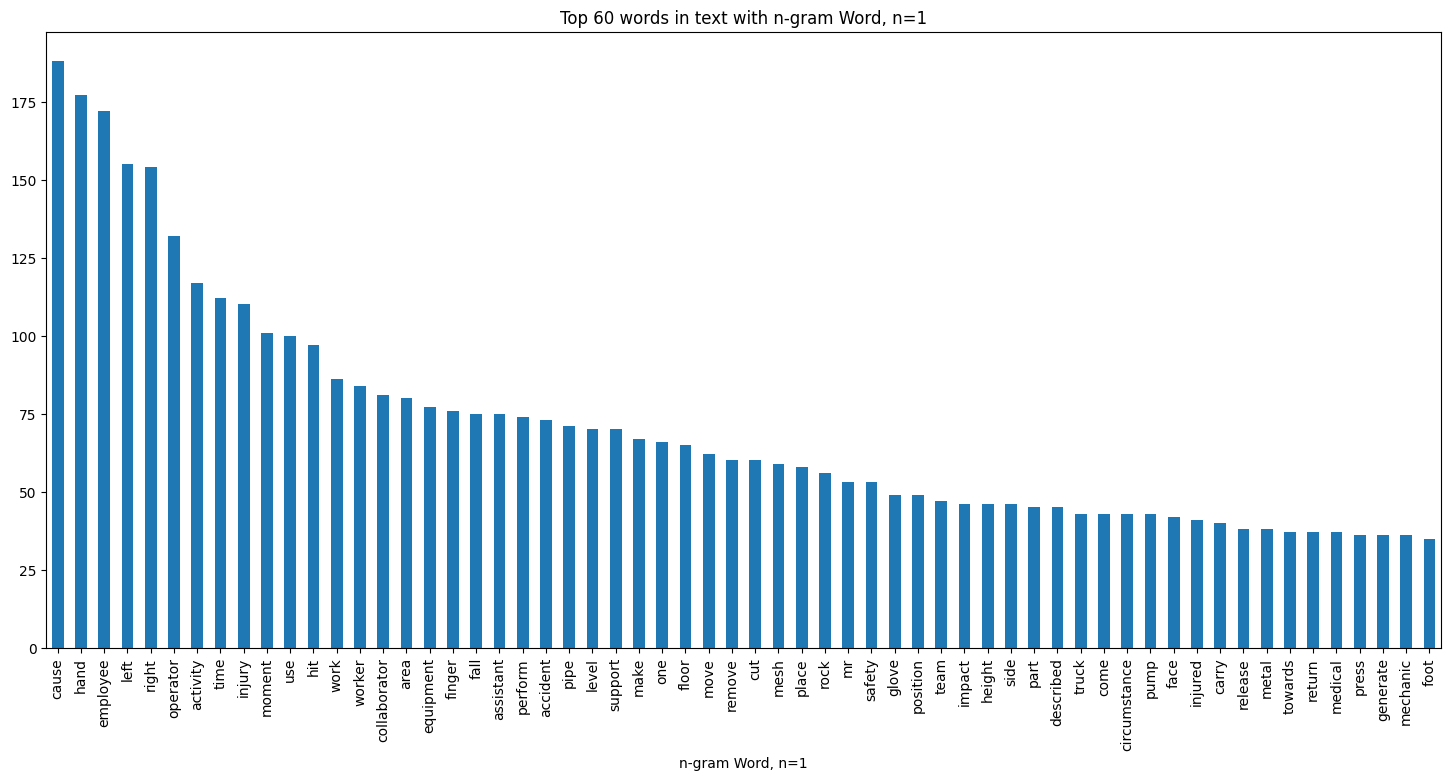

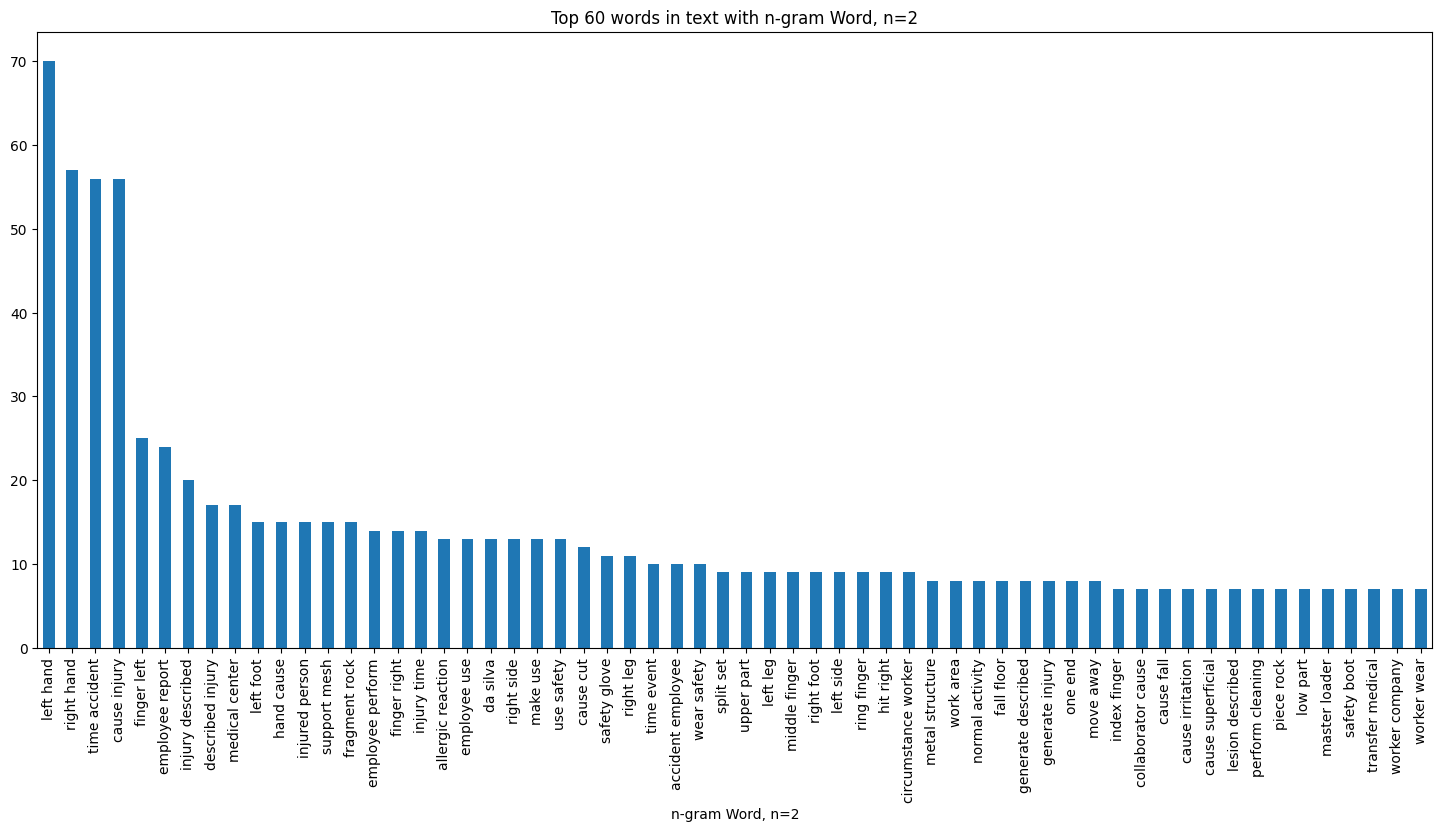

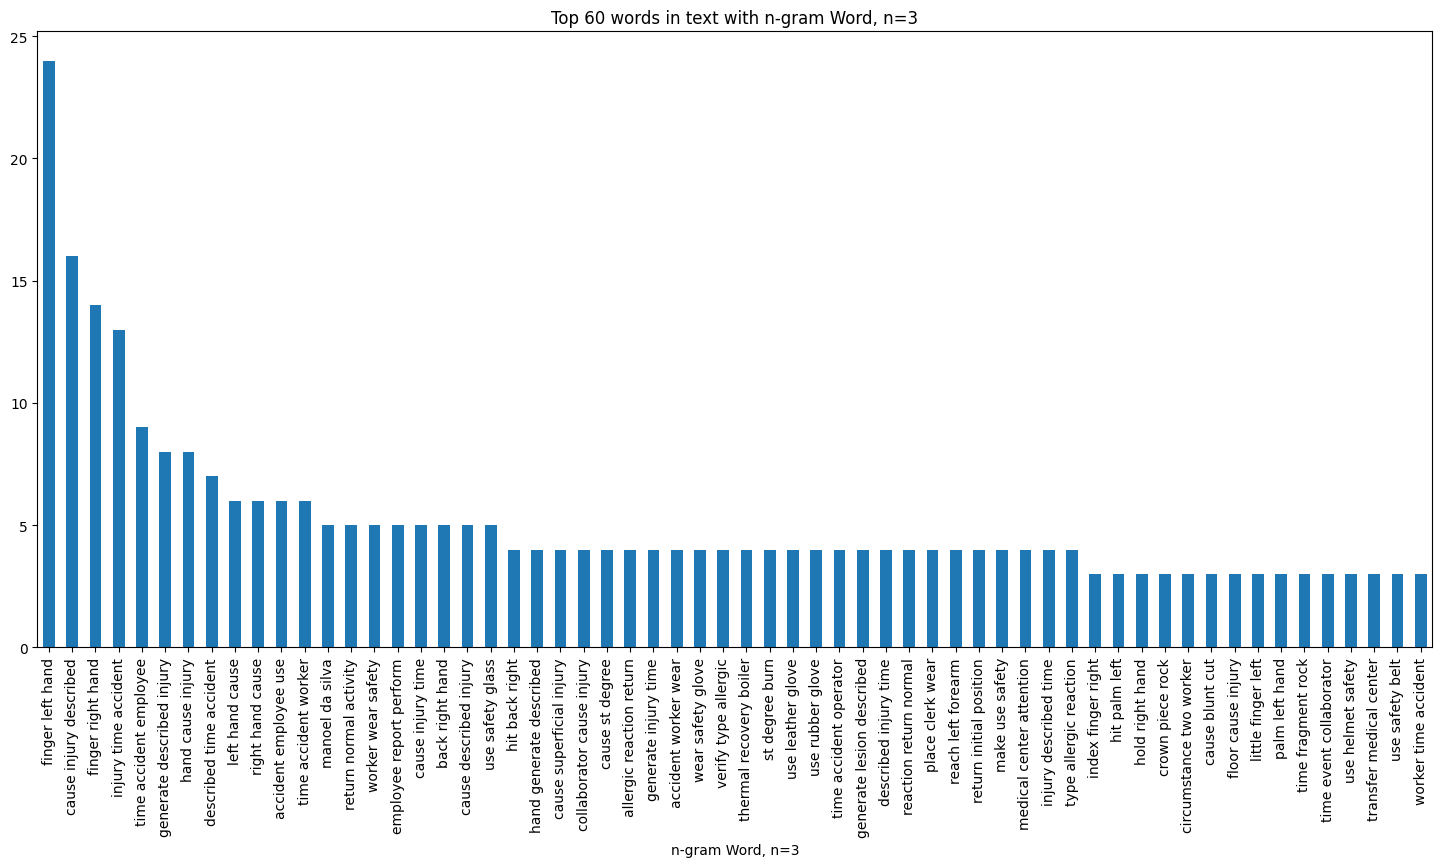

In [54]:
get_top_n_words(dataset['Cleaned Description'], 1, 60) #UniGrams
get_top_n_words(dataset['Cleaned Description'], 2, 60) #BiGrams
get_top_n_words(dataset['Cleaned Description'], 3, 60) #TriGrams

### Observations on n-grams
- Hands/Finger/Palm Movement:
    - left, right
- Body Movements:
    - leg, foot, eye
- Equipments:
    - safety gloves, leather glove, safety helmet
- cause/accident:
    - hit, cut, burn, fall, irritation, lose balance

## Step 4: Data preparation - Cleansed data in .xlsx or .csv file
- Categorical Features Encoding
  - Ordinal Columns -> Numbers
  - Nominal Columns -> Dummies/One-hot
    - PreProcess the values to have only alphaNumeric and underscore
    - Use shortend Prefixes while encoding
- Dropping Date and related fields as - It acts as incident reporing time, no direct relation on when the incident can happen.  
- Word2Vec embedding for feature extraction on `Description`
- Join the extracted features from `Description` to a single dataframe
- Save the cleansed file with feature extraction.

Feature Encoding

In [55]:
# Ordinal columns - `Accident level`, `Potential Accident Level` conversion to ordered integers
Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'  :   6
}
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'  :   6
}
dataset['Potential Accident Level'] = dataset['Potential Accident Level'].map(Potential_Accident_Level)
dataset['Accident Level'] = dataset['Accident Level'].map(Accident_Level)
print(dataset['Potential Accident Level'].value_counts())
print(dataset['Accident Level'].value_counts())

Potential Accident Level
4    141
3    106
2     95
1     45
5     30
6      1
Name: count, dtype: int64
Accident Level
1    309
2     40
3     31
4     30
5      8
Name: count, dtype: int64


In [56]:
nominalCols=["Country","Local","Industry Sector","Gender","Employee Type","Critical Risk"]
for col in nominalCols:
  dataset[col] = dataset[col].str.replace('\n', '').str.replace('(','').str.replace(')','').str.replace(' ', '_')
  print(f"UniqueValue for column: {col}\n {dataset[col].unique()}\n")

UniqueValue for column: Country
 ['Country_01' 'Country_02' 'Country_03']

UniqueValue for column: Local
 ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

UniqueValue for column: Industry Sector
 ['Mining' 'Metals' 'Others']

UniqueValue for column: Gender
 ['Male' 'Female']

UniqueValue for column: Employee Type
 ['Third_Party' 'Employee' 'Third_Party_Remote']

UniqueValue for column: Critical Risk
 ['Pressed' 'Pressurized_Systems' 'Manual_Tools' 'Others'
 'Fall_prevention_same_level' 'Chemical_substances' 'Liquid_Metal'
 'Electrical_installation' 'Confined_space'
 'Pressurized_Systems/Chemical_Substances'
 'Blocking_and_isolation_of_energies' 'Suspended_Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall_prevention' 'Not_applicable' 'Traffic' 'Projection'
 'Venomous_Animals' 'Plates' 'Projection/Burning' 'remains_of_choco'
 'Vehicles_and_Mobile_Equipment' 'Projection/Choco' 'Machine_Protection'
 'Power_lock' 

In [57]:
#Adding short prefixes for dummy columns - "Country","Local","Industry Sector","Gender","Employee Type","Critical Risk"
for col in nominalCols:
  col_prefix=''
  if col == 'Country':
    col_prefix ='C'
  if col == 'Local':
    col_prefix = 'Loc'
  if col == 'Gender':
    col_prefix = 'G'
  elif col == 'Industry Sector':
    col_prefix = 'IS'
  elif col == 'Employee Type':
    col_prefix = 'ET'
  elif col == 'Critical Risk':
    col_prefix = 'CR'
  dataset=pd.get_dummies(dataset, columns=[col], prefix=col_prefix, drop_first=True, dtype=int)

In [58]:
#dropping date related columns
dateAndExtractedColumns = ['Date', 'year', 'month', 'day', 'year_month', 'quarter', 'year_quarter']
for col in dateAndExtractedColumns:
  dataset = dataset.drop(col, axis=1)

In [59]:
dataset.head().T

,0,1,2,3,4
Accident Level,1,1,1,1,4
Potential Accident Level,4,4,3,1,4
Description,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.","During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.","In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.","Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.","Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
Cleaned Description,remove drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo,activation sodium sulphide pump pip uncoupled sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution gram liter,substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area left foot collaborator cause injury,ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head worn proceed mr cristbal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moment two collaborator rotate lever anticlockwise direction leave key bolt hit palm left hand cause injury,circumstance mechanic anthony group leader eduardo eric fernndezinjuredthe three company impromec perform removal pulley motor pump zaf marcy length weight lock proceed heating pulley loosen come fall distance high hit instep right foot worker cause injury described
C_Country_02,0,1,0,0,0
C_Country_03,0,0,0,0,0
Loc_Local_02,0,1,0,0,0
Loc_Local_03,0,0,1,0,0
Loc_Local_04,0,0,0,1,1
Loc_Local_05,0,0,0,0,0


### `Word2Vec` is imported from Gensim library

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `Workers`: These are the number of threads to train the model.
    4. 'window': Size of context relative to target word.

- By default, it creates word vectors of size 100.

In [60]:
# Creating an instance of Word2Vec
vec_size = 200
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['Cleaned Description'].values]
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)


In [61]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2475


In [62]:
# Checking the word embedding of a random word from wordlist
model_W2V.wv['injury']

array([ 0.00473856, -0.00945338,  0.00892354,  0.01741328,  0.02739632,
       -0.01621418, -0.00513712,  0.03592376, -0.00933125,  0.01577029,
       -0.01134342, -0.02028513, -0.00382854,  0.02479619, -0.0104399 ,
       -0.00339043, -0.01707229, -0.00830837,  0.00393798, -0.03696791,
        0.01210219, -0.0139005 ,  0.00194903,  0.0095738 ,  0.00143697,
       -0.01039125,  0.00110918, -0.02683374, -0.02195013,  0.00852217,
        0.02357573,  0.00536369,  0.01207762,  0.0001724 ,  0.01248361,
        0.01829407,  0.01668812, -0.00837565, -0.01215391, -0.03088346,
       -0.00949332, -0.00513583, -0.00272071,  0.01270387,  0.03456341,
       -0.0006461 , -0.00809686, -0.01295838,  0.0146234 ,  0.01428772,
        0.00826636, -0.0077931 , -0.00975985, -0.01125861,  0.00466277,
       -0.00117679,  0.00128419, -0.01964463, -0.02576384,  0.00212358,
        0.00067121,  0.00383002, -0.00919639, -0.00197426, -0.03099319,
       -0.00071416, -0.00551871,  0.03769377, -0.01329074,  0.02

In [63]:
model_W2V.wv['fall']

array([ 0.00819464, -0.00135903,  0.0058152 ,  0.0241146 ,  0.03055136,
       -0.02137166, -0.00054006,  0.04369399, -0.01205288,  0.02494975,
       -0.01056975, -0.02515214,  0.00178102,  0.02755697, -0.00790622,
       -0.00897016, -0.01721857, -0.00704232,  0.00713637, -0.04399923,
        0.00860831, -0.02944895, -0.00507016,  0.0127295 , -0.00174033,
       -0.01938303, -0.00252626, -0.03409179, -0.02912938,  0.01063873,
        0.02686992,  0.01086601,  0.02003768,  0.00292891,  0.0146984 ,
        0.02699613,  0.02419555, -0.00336328, -0.01590349, -0.03407805,
       -0.01624203,  0.00217005,  0.00398306,  0.01208229,  0.04541709,
       -0.00723151, -0.00178945, -0.01115158,  0.01693472,  0.01994699,
        0.01460064, -0.00350835, -0.01589204, -0.02154025,  0.00560354,
       -0.00787575,  0.00531854, -0.01856556, -0.02727715, -0.00070683,
       -0.00373223,  0.00027807, -0.017146  , -0.00802139, -0.03995059,
       -0.0079187 , -0.00163791,  0.05178491, -0.02226484,  0.03

In [64]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [65]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [66]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(dataset['Cleaned Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 190,Feature 191,Feature 192,Feature 193,Feature 194,Feature 195,Feature 196,Feature 197,Feature 198,Feature 199
0,0.003558,-0.005087,0.004266,0.013801,0.018141,-0.014376,-0.004087,0.025281,-0.007670,0.013069,...,0.011621,-0.006841,-0.009897,-0.014710,0.012298,0.009159,0.010740,-0.017818,-0.000768,-0.006309
1,0.000759,-0.001549,0.002408,0.005434,0.009084,-0.006944,-0.001771,0.011172,-0.003990,0.005929,...,0.005880,-0.003759,-0.005046,-0.007355,0.006968,0.003540,0.005085,-0.009386,-0.001431,-0.003041
2,0.003365,-0.003024,0.005194,0.015363,0.020379,-0.014836,-0.003315,0.026705,-0.008878,0.013078,...,0.012741,-0.009630,-0.009572,-0.016337,0.013883,0.010268,0.011028,-0.019937,-0.001780,-0.004743
3,0.003059,-0.003035,0.004596,0.012688,0.016497,-0.012600,-0.003127,0.022053,-0.007151,0.010657,...,0.009459,-0.007781,-0.008484,-0.013586,0.010550,0.008472,0.008518,-0.015977,-0.001099,-0.004734
4,0.002242,-0.002575,0.003506,0.010854,0.014594,-0.011276,-0.002552,0.018915,-0.006443,0.010245,...,0.009341,-0.005262,-0.006879,-0.011710,0.009302,0.007055,0.008207,-0.013552,-0.000956,-0.004910


In [67]:
dataset = dataset.join(df_Word2Vec.reset_index(drop=True))

In [68]:
dataset.head().T

,0,1,2,3,4
Accident Level,1,1,1,1,4
Potential Accident Level,4,4,3,1,4
Description,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.","During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.","In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.","Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.","Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
Cleaned Description,remove drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo,activation sodium sulphide pump pip uncoupled sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution gram liter,substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area left foot collaborator cause injury,ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head worn proceed mr cristbal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moment two collaborator rotate lever anticlockwise direction leave key bolt hit palm left hand cause injury,circumstance mechanic anthony group leader eduardo eric fernndezinjuredthe three company impromec perform removal pulley motor pump zaf marcy length weight lock proceed heating pulley loosen come fall distance high hit instep right foot worker cause injury described
C_Country_02,0,1,0,0,0
...,...,...,...,...,...
Feature 195,0.009159,0.00354,0.010268,0.008472,0.007055
Feature 196,0.01074,0.005085,0.011028,0.008518,0.008207
Feature 197,-0.017818,-0.009386,-0.019937,-0.015977,-0.013552
Feature 198,-0.000768,-0.001431,-0.00178,-0.001099,-0.000956


In [69]:
#Writing cleaned data as xlsx file in same folder
dataset.to_excel('/content/drive/MyDrive/NLP_Chatbot/NLP_Chatbot_Capstone/word2VecCleanedIndustryData.xlsx',index=False)

## ‣ Step 5: Design train and test basic machine learning classifiers
- Load the saved dataset
- Test Train Split 70%-30%
- Normalization and Scaling
- Upscaling of traget varaible using SMOTE
- Training and Testing basic machine learning classifiers
  - RANDOM FOREST
  - LOGISTIC RESGRESSION
  - KNN
  - SVM
  - RF with ADABoost
- Observation on `how to improve performances of base Model`  

In [70]:
# loading the dataset from created file
cleaned_sheet = 'Sheet1'
cleaned_file_name = '/content/drive/MyDrive/NLP_Chatbot/NLP_Chatbot_Capstone/word2VecCleanedIndustryData.xlsx'
industry_cleaned_df = pd.read_excel(cleaned_file_name, sheet_name=cleaned_sheet)

In [71]:
industry_cleaned_df.head().T

,0,1,2,3,4
Accident Level,1,1,1,1,4
Potential Accident Level,4,4,3,1,4
Description,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.","During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.","In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.","Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.","Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
Cleaned Description,remove drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo,activation sodium sulphide pump pip uncoupled sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution gram liter,substation milpo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area left foot collaborator cause injury,ob personnel begin task unlock soquet bolt bhb machine penultimate bolt identify hexagonal head worn proceed mr cristbal auxiliary assistant climb platform exert pressure hand dado key prevent come bolt moment two collaborator rotate lever anticlockwise direction leave key bolt hit palm left hand cause injury,circumstance mechanic anthony group leader eduardo eric fernndezinjuredthe three company impromec perform removal pulley motor pump zaf marcy length weight lock proceed heating pulley loosen come fall distance high hit instep right foot worker cause injury described
C_Country_02,0,1,0,0,0
...,...,...,...,...,...
Feature 195,0.009159,0.00354,0.010268,0.008472,0.007055
Feature 196,0.01074,0.005085,0.011028,0.008518,0.008207
Feature 197,-0.017818,-0.009386,-0.019937,-0.015977,-0.013552
Feature 198,-0.000768,-0.001431,-0.00178,-0.001099,-0.000956


In [72]:
industry_cleaned_df.shape

(418, 254)

Extract Target and Independent Variable

In [73]:
# separate the features and target variable
X_orig = industry_cleaned_df.drop(['Accident Level','Potential Accident Level', 'Description', 'Cleaned Description'], axis = 1) # Considering all Predictors
y_orig = industry_cleaned_df['Accident Level']

In [74]:
# Split data into training and testing set.

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

Oversampling for non majority Training classes of Target using RandomOverSampler

In [75]:
# determine the size of the largest class
largest_class_size =  y_train_orig.value_counts().max()

# create a RandomOverSampler object and fit_resample on X and y
ros = RandomOverSampler(sampling_strategy='auto')

# fit_resample on X and y
X_train_ros, y_train_ros = ros.fit_resample(X_train_orig, y_train_orig)

# print the original and resampled class distributions
print('Original class distribution:\n',  y_train_orig.value_counts())
print('Resampled class distribution:\n', y_train_ros.value_counts())

Original class distribution:
 Accident Level
1    246
2     32
3     27
4     23
5      6
Name: count, dtype: int64
Resampled class distribution:
 Accident Level
1    246
3    246
4    246
2    246
5    246
Name: count, dtype: int64


Oversampling for non majority Training classes of Target using SMOTE

In [76]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train_orig, y_train_orig)

# print the original and resampled class distributions
print('Original class distribution:\n', y_orig.value_counts())
print('Resampled class distribution:\n', y_train_smote.value_counts())

Original class distribution:
 Accident Level
1    309
2     40
3     31
4     30
5      8
Name: count, dtype: int64
Resampled class distribution:
 Accident Level
1    246
3    246
4    246
2    246
5    246
Name: count, dtype: int64


In [83]:
def train_test_model(model, name, X_train, X_test, y_train, y_test, of_type, index, report):

    if report == "yes":
        print (model)
        print ("***************************************************************************")

    #Fit the model on training sets
    model.fit(X_train, y_train)

    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")

        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    y_predictions = model.predict_proba(X_test)
    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score_res = precision_score(y_test, y_pred, average='weighted')
    recall_score_res = recall_score(y_test, y_pred, average='weighted')
    f1_score_res = f1_score(y_test, y_pred, average='weighted')

    if report == 'yes':
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score,
                              'Precision': precision_score_res, 'Recall': recall_score_res, 'F1-Score': f1_score_res}, index=[index])

    return resultsDf

In [84]:
def train_test_allmodels(models, X_train_common, X_test_common, y_train, y_test, report):
    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, report)

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1
    return resultsDf_common

In [85]:
# define base classification models
logistic_base_model = LogisticRegression(multi_class='multinomial', random_state = 42)
knn_base_model = KNeighborsClassifier(n_neighbors = 3)#n_neighbors = 3,
svc_base_model = SVC(probability=True, random_state=42)#kernel = 'rbf', probability=True,
dtclf_base_model = DecisionTreeClassifier(random_state=42)#criterion = 'gini', random_state=42
rf_base_model = RandomForestClassifier(random_state=42)#n_estimators=10, random_state=42
bagclf_base_model = BaggingClassifier(random_state=42)#n_estimators=30, max_samples=0.75, random_state=42, oob_score=True
adaclf_base_model = AdaBoostClassifier(random_state=42)#n_estimators=100, learning_rate=0.25, random_state=42
gb_base_model = GradientBoostingClassifier(random_state=42)#loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2,random_state=42
models=[
	    ['LogisticRegression', logistic_base_model],
        ['KNeighborsClassifier',knn_base_model],
        ['SVC',svc_base_model],
        ['DecisionTreeClassifier',dtclf_base_model],
        ['RandomForestClassifier',rf_base_model],
        ['BaggingClassifier',bagclf_base_model],
        ['AdaBoostClassifier',adaclf_base_model],
        ['GradientBoostingClassifier',gb_base_model]
    ]

LogisticRegression(multi_class='multinomial', random_state=42)
***************************************************************************


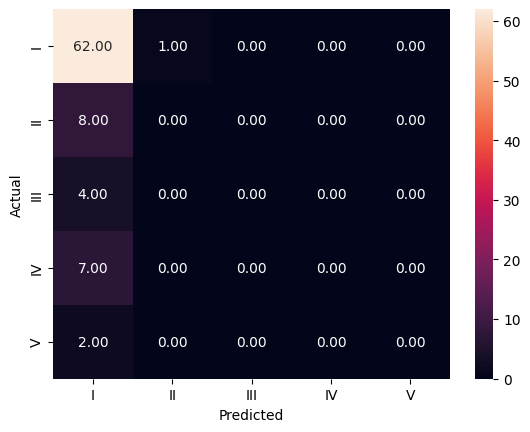

              precision    recall  f1-score   support

           1       0.75      0.98      0.85        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.74      0.64        84

KNeighborsClassifier(n_neighbors=3)
***************************************************************************


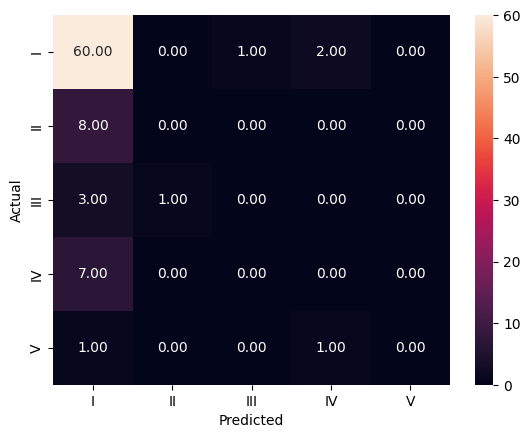

              precision    recall  f1-score   support

           1       0.76      0.95      0.85        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.57      0.71      0.63        84

SVC(probability=True, random_state=42)
***************************************************************************


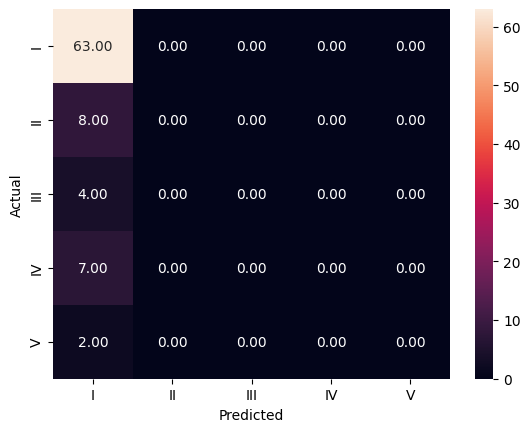

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84

DecisionTreeClassifier(random_state=42)
***************************************************************************


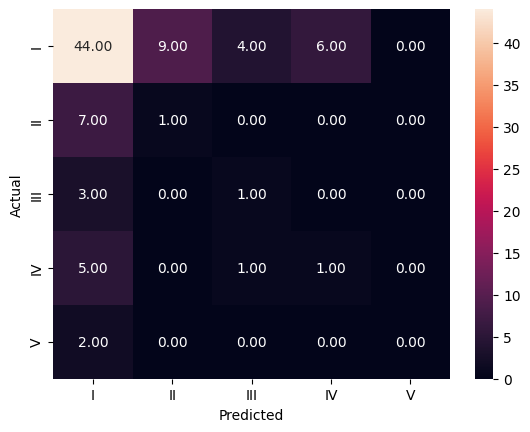

              precision    recall  f1-score   support

           1       0.72      0.70      0.71        63
           2       0.10      0.12      0.11         8
           3       0.17      0.25      0.20         4
           4       0.14      0.14      0.14         7
           5       0.00      0.00      0.00         2

    accuracy                           0.56        84
   macro avg       0.23      0.24      0.23        84
weighted avg       0.57      0.56      0.56        84

RandomForestClassifier(random_state=42)
***************************************************************************


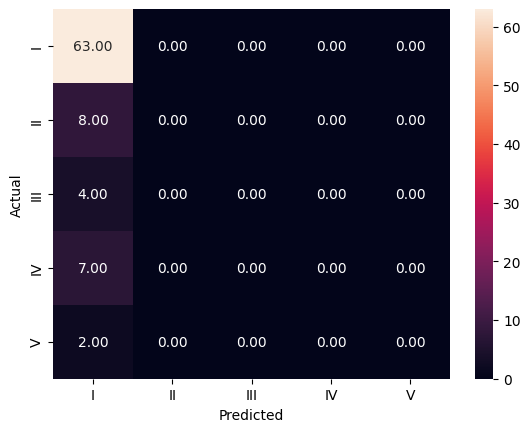

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84

BaggingClassifier(random_state=42)
***************************************************************************


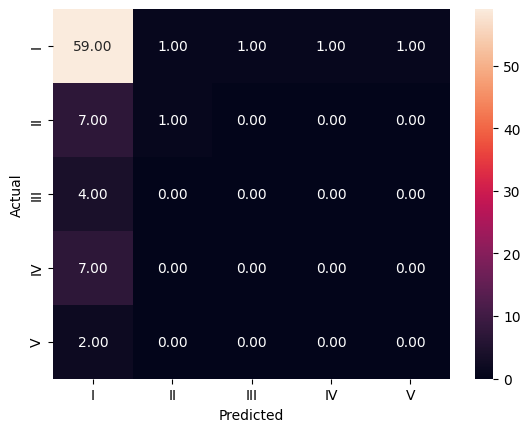

              precision    recall  f1-score   support

           1       0.75      0.94      0.83        63
           2       0.50      0.12      0.20         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.25      0.21      0.21        84
weighted avg       0.61      0.71      0.64        84

AdaBoostClassifier(random_state=42)
***************************************************************************


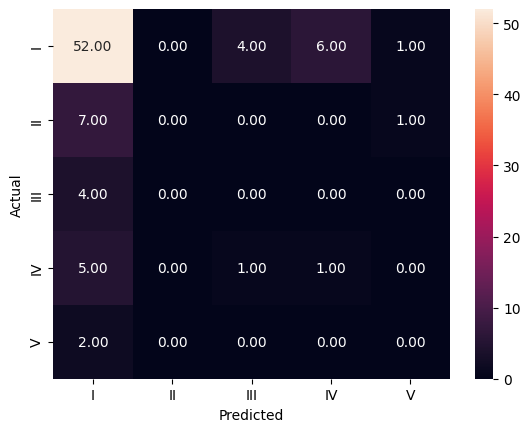

              precision    recall  f1-score   support

           1       0.74      0.83      0.78        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.14      0.14      0.14         7
           5       0.00      0.00      0.00         2

    accuracy                           0.63        84
   macro avg       0.18      0.19      0.18        84
weighted avg       0.57      0.63      0.60        84

GradientBoostingClassifier(random_state=42)
***************************************************************************


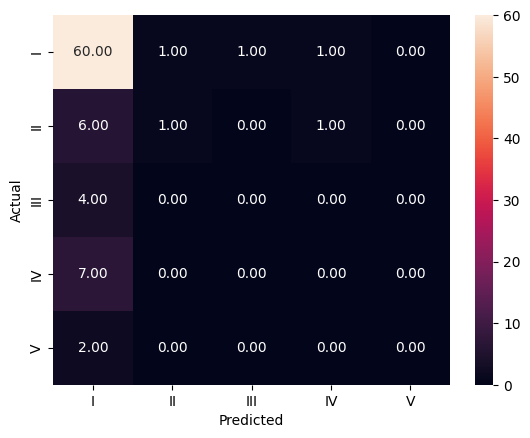

              precision    recall  f1-score   support

           1       0.76      0.95      0.85        63
           2       0.50      0.12      0.20         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.25      0.22      0.21        84
weighted avg       0.62      0.73      0.65        84



,Name,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
1,LogisticRegression,0.733533,0.738095,0.560241,0.738095,0.636986
2,KNeighborsClassifier,0.769461,0.714286,0.569620,0.714286,0.633803
3,SVC,0.736527,0.750000,0.562500,0.750000,0.642857
4,DecisionTreeClassifier,0.997006,0.559524,0.570349,0.559524,0.564269
5,RandomForestClassifier,0.997006,0.750000,0.562500,0.750000,0.642857
6,BaggingClassifier,0.973054,0.714286,0.607746,0.714286,0.642287
7,AdaBoostClassifier,0.634731,0.630952,0.569048,0.630952,0.598371
8,GradientBoostingClassifier,0.997006,0.726190,0.617239,0.726190,0.652850


In [86]:
# Train and Test all base models with original train set
train_test_allmodels(models, X_train_orig, X_test_orig, y_train_orig, y_test_orig, 'yes')

LogisticRegression(multi_class='multinomial', random_state=42)
***************************************************************************


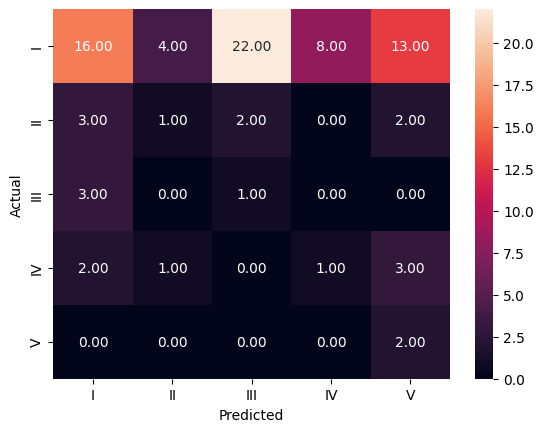

              precision    recall  f1-score   support

           1       0.67      0.25      0.37        63
           2       0.17      0.12      0.14         8
           3       0.04      0.25      0.07         4
           4       0.11      0.14      0.12         7
           5       0.10      1.00      0.18         2

    accuracy                           0.25        84
   macro avg       0.22      0.35      0.18        84
weighted avg       0.53      0.25      0.31        84

KNeighborsClassifier(n_neighbors=3)
***************************************************************************


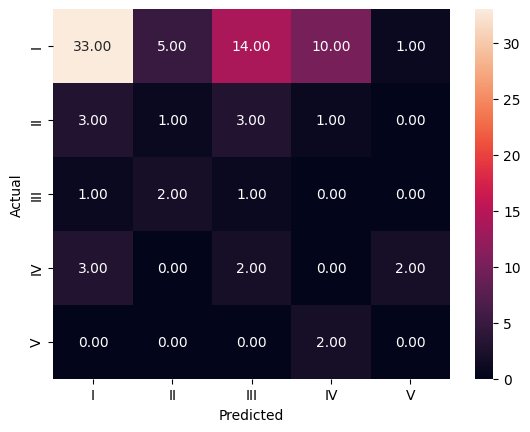

              precision    recall  f1-score   support

           1       0.82      0.52      0.64        63
           2       0.12      0.12      0.12         8
           3       0.05      0.25      0.08         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.42        84
   macro avg       0.20      0.18      0.17        84
weighted avg       0.63      0.42      0.50        84

SVC(probability=True, random_state=42)
***************************************************************************


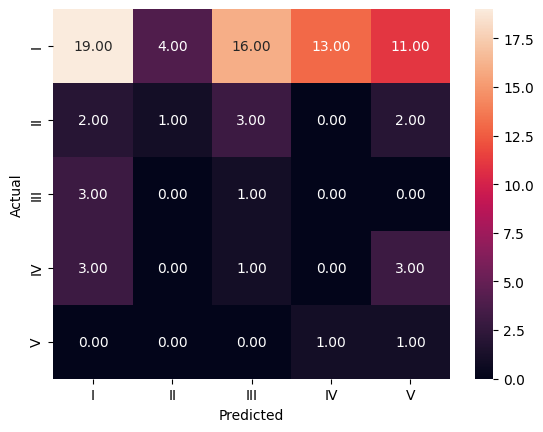

              precision    recall  f1-score   support

           1       0.70      0.30      0.42        63
           2       0.20      0.12      0.15         8
           3       0.05      0.25      0.08         4
           4       0.00      0.00      0.00         7
           5       0.06      0.50      0.11         2

    accuracy                           0.26        84
   macro avg       0.20      0.24      0.15        84
weighted avg       0.55      0.26      0.34        84

DecisionTreeClassifier(random_state=42)
***************************************************************************


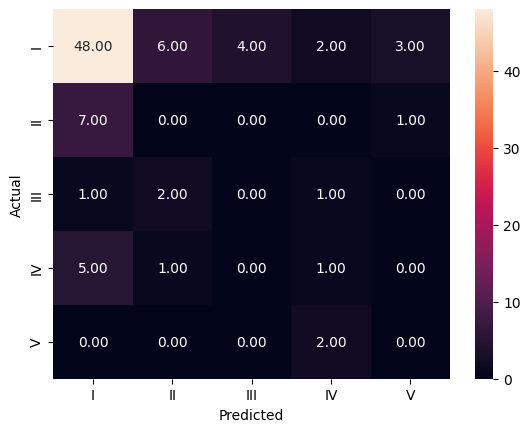

              precision    recall  f1-score   support

           1       0.79      0.76      0.77        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.17      0.14      0.15         7
           5       0.00      0.00      0.00         2

    accuracy                           0.58        84
   macro avg       0.19      0.18      0.19        84
weighted avg       0.60      0.58      0.59        84

RandomForestClassifier(random_state=42)
***************************************************************************


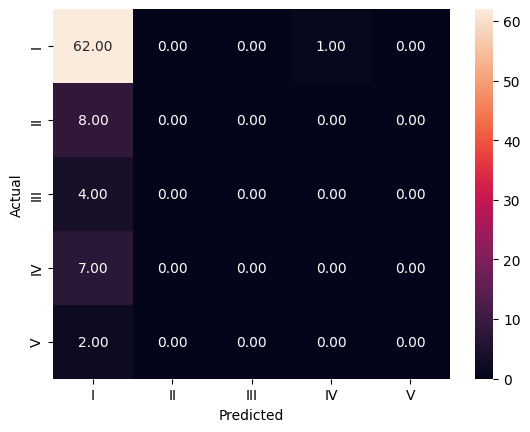

              precision    recall  f1-score   support

           1       0.75      0.98      0.85        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.74      0.64        84

BaggingClassifier(random_state=42)
***************************************************************************


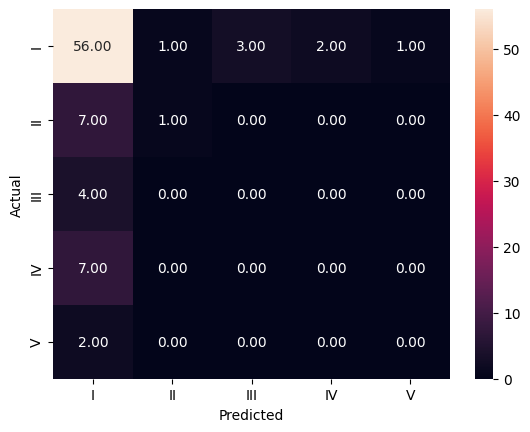

              precision    recall  f1-score   support

           1       0.74      0.89      0.81        63
           2       0.50      0.12      0.20         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.25      0.20      0.20        84
weighted avg       0.60      0.68      0.62        84

AdaBoostClassifier(random_state=42)
***************************************************************************


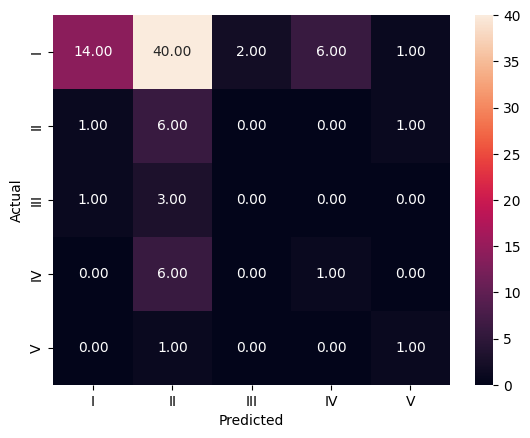

              precision    recall  f1-score   support

           1       0.88      0.22      0.35        63
           2       0.11      0.75      0.19         8
           3       0.00      0.00      0.00         4
           4       0.14      0.14      0.14         7
           5       0.33      0.50      0.40         2

    accuracy                           0.26        84
   macro avg       0.29      0.32      0.22        84
weighted avg       0.69      0.26      0.31        84

GradientBoostingClassifier(random_state=42)
***************************************************************************


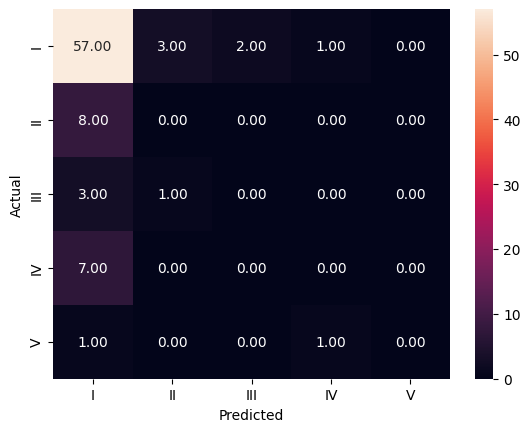

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.15      0.18      0.16        84
weighted avg       0.56      0.68      0.62        84



,Name,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
1,LogisticRegression,0.599187,0.250000,0.529418,0.250000,0.307497
2,KNeighborsClassifier,0.939024,0.416667,0.633036,0.416667,0.496456
3,SVC,0.686179,0.261905,0.550494,0.261905,0.337634
4,DecisionTreeClassifier,0.995122,0.583333,0.604053,0.583333,0.593466
5,RandomForestClassifier,0.995122,0.738095,0.560241,0.738095,0.636986
6,BaggingClassifier,0.995122,0.678571,0.600251,0.678571,0.623364
7,AdaBoostClassifier,0.393496,0.261905,0.686295,0.261905,0.305108
8,GradientBoostingClassifier,0.995122,0.678571,0.562500,0.678571,0.615108


In [87]:
# Train and Test all base models with Random-Oversampled train set
train_test_allmodels(models, X_train_ros, X_test_orig, y_train_ros, y_test_orig, 'yes')

LogisticRegression(multi_class='multinomial', random_state=42)
***************************************************************************


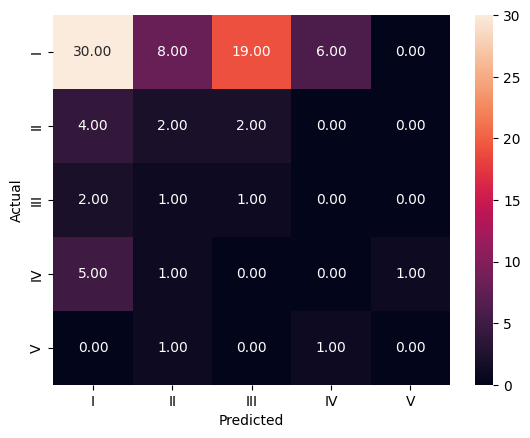

              precision    recall  f1-score   support

           1       0.73      0.48      0.58        63
           2       0.15      0.25      0.19         8
           3       0.05      0.25      0.08         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.39        84
   macro avg       0.19      0.20      0.17        84
weighted avg       0.57      0.39      0.45        84

KNeighborsClassifier(n_neighbors=3)
***************************************************************************


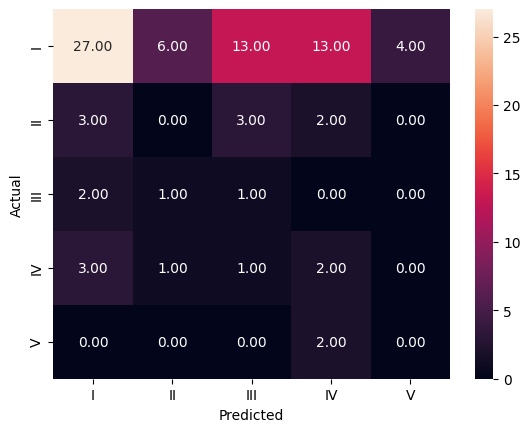

              precision    recall  f1-score   support

           1       0.77      0.43      0.55        63
           2       0.00      0.00      0.00         8
           3       0.06      0.25      0.09         4
           4       0.11      0.29      0.15         7
           5       0.00      0.00      0.00         2

    accuracy                           0.36        84
   macro avg       0.19      0.19      0.16        84
weighted avg       0.59      0.36      0.43        84

SVC(probability=True, random_state=42)
***************************************************************************


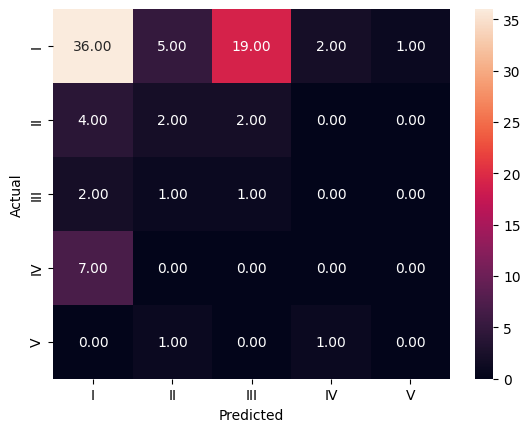

              precision    recall  f1-score   support

           1       0.73      0.57      0.64        63
           2       0.22      0.25      0.24         8
           3       0.05      0.25      0.08         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.46        84
   macro avg       0.20      0.21      0.19        84
weighted avg       0.57      0.46      0.51        84

DecisionTreeClassifier(random_state=42)
***************************************************************************


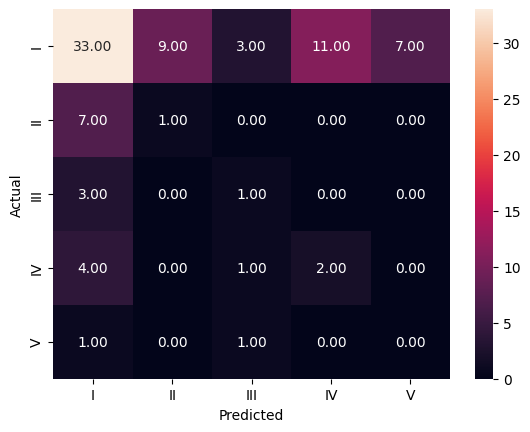

              precision    recall  f1-score   support

           1       0.69      0.52      0.59        63
           2       0.10      0.12      0.11         8
           3       0.17      0.25      0.20         4
           4       0.15      0.29      0.20         7
           5       0.00      0.00      0.00         2

    accuracy                           0.44        84
   macro avg       0.22      0.24      0.22        84
weighted avg       0.55      0.44      0.48        84

RandomForestClassifier(random_state=42)
***************************************************************************


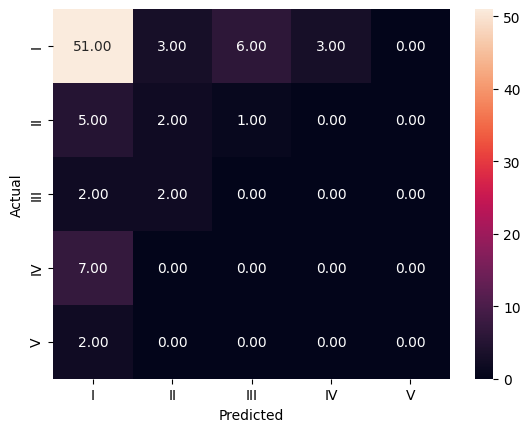

              precision    recall  f1-score   support

           1       0.76      0.81      0.78        63
           2       0.29      0.25      0.27         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.63        84
   macro avg       0.21      0.21      0.21        84
weighted avg       0.60      0.63      0.61        84

BaggingClassifier(random_state=42)
***************************************************************************


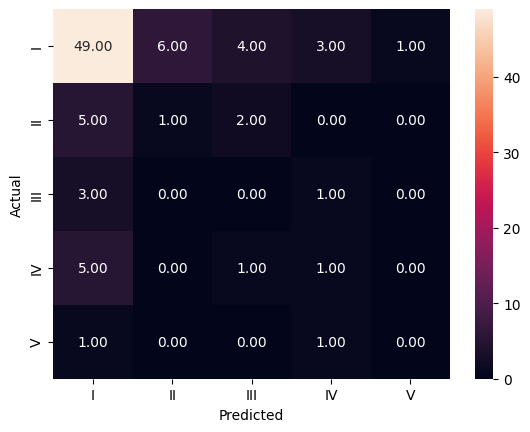

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        63
           2       0.14      0.12      0.13         8
           3       0.00      0.00      0.00         4
           4       0.17      0.14      0.15         7
           5       0.00      0.00      0.00         2

    accuracy                           0.61        84
   macro avg       0.22      0.21      0.21        84
weighted avg       0.61      0.61      0.61        84

AdaBoostClassifier(random_state=42)
***************************************************************************


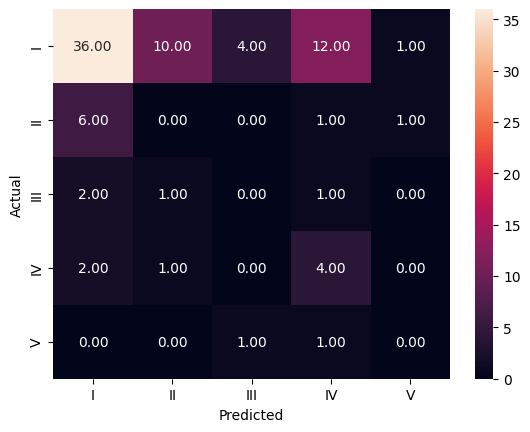

              precision    recall  f1-score   support

           1       0.78      0.57      0.66        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.21      0.57      0.31         7
           5       0.00      0.00      0.00         2

    accuracy                           0.48        84
   macro avg       0.20      0.23      0.19        84
weighted avg       0.60      0.48      0.52        84

GradientBoostingClassifier(random_state=42)
***************************************************************************


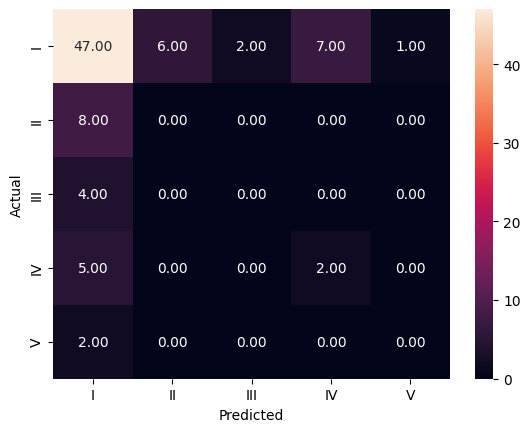

              precision    recall  f1-score   support

           1       0.71      0.75      0.73        63
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.22      0.29      0.25         7
           5       0.00      0.00      0.00         2

    accuracy                           0.58        84
   macro avg       0.19      0.21      0.20        84
weighted avg       0.55      0.58      0.57        84



,Name,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
1,LogisticRegression,0.655285,0.392857,0.565597,0.392857,0.454496
2,KNeighborsClassifier,0.894309,0.357143,0.589989,0.357143,0.430415
3,SVC,0.686179,0.464286,0.574349,0.464286,0.508215
4,DecisionTreeClassifier,0.999187,0.440476,0.545906,0.440476,0.482718
5,RandomForestClassifier,0.999187,0.630952,0.598106,0.630952,0.613858
6,BaggingClassifier,0.997561,0.607143,0.610828,0.607143,0.608852
7,AdaBoostClassifier,0.616260,0.476190,0.604500,0.476190,0.521054
8,GradientBoostingClassifier,0.999187,0.583333,0.552609,0.583333,0.567345


In [88]:
# Train and Test all base models with SMOTE train set
train_test_allmodels(models, X_train_smote, X_test_orig, y_train_smote, y_test_orig, 'yes')

Performance Optimization based on hyper-parameter tuning for all base models

In [101]:
def getHyperparameterTunedModelOnDataSplit(indVar, tarVar):
  hyparamTuned_models = []

  # LogisticClassifier Param Grid
  param_grid_logistic = {
      'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'C' : [100, 10, 1.0, 0.1, 0.01],
      'solver' : ['lbfgs','newton-cg','liblinear'],
      'max_iter' : [50, 100, 250, 500]
    }

  clf_lc = GridSearchCV(logistic_base_model, param_grid = param_grid_logistic, cv = 3, verbose=True, n_jobs=-1)
  best_clf_lc = clf_lc.fit(indVar,tarVar)
  logistic_hyparamTuned_model = best_clf_lc.best_estimator_
  hyparamTuned_models.append(["LogisticClassifier_Tuned",logistic_hyparamTuned_model])

  # KNeighborsClassifier Param Grid
  param_grid_knn = { 'n_neighbors' : [3,5,7,9,11,13,17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  clf_knn = GridSearchCV(knn_base_model, param_grid = param_grid_knn, cv = 3, verbose=True, n_jobs=-1)
  best_clf_knn = clf_knn.fit(indVar,tarVar)
  knn_hyparamTuned_model = best_clf_knn.best_estimator_
  hyparamTuned_models.append(["KNeighborsClassifier_Tuned",knn_hyparamTuned_model])

  # SupportVectorClassifier Param Grid
  param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
  clf_svm = GridSearchCV(svc_base_model, param_grid = param_grid_svm, cv = 3, verbose=True, n_jobs=-1)
  best_clf_svm = clf_svm.fit(indVar,tarVar)
  svm_hyparamTuned_model = best_clf_svm.best_estimator_
  hyparamTuned_models.append(["SVC_Tuned",svm_hyparamTuned_model])

  # DecisionTreeClassifier Param Grid
  param_grid_dt = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
  }
  clf_dt = GridSearchCV(dtclf_base_model, param_grid = param_grid_dt, cv = 3, verbose=True, n_jobs=-1)
  best_clf_dt = clf_dt.fit(indVar,tarVar)
  dt_hyparamTuned_model = best_clf_dt.best_estimator_
  hyparamTuned_models.append(["DecisionTreeClassifier_Tuned",dt_hyparamTuned_model])

  # RandomForestClassifier Param Grid
  param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6],
    'max_leaf_nodes': [3, 6, 9],
  }
  clf_rf = GridSearchCV(rf_base_model, param_grid = param_grid_rf, cv = 3, verbose=True, n_jobs=-1)
  best_clf_rf = clf_rf.fit(indVar,tarVar)
  rf_hyparamTuned_model = best_clf_rf.best_estimator_
  hyparamTuned_models.append(["RandomForestClassifier_Tuned",rf_hyparamTuned_model])

  # BaggingClassifier Param Grid
  param_grid_bc = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': [0.90, 0.92, 0.95, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True]
  }
  clf_bc = GridSearchCV(bagclf_base_model, param_grid = param_grid_bc, cv = 3, verbose=True, n_jobs=-1)
  best_clf_bc = clf_bc.fit(indVar,tarVar)
  bc_hyparamTuned_model = best_clf_bc.best_estimator_
  hyparamTuned_models.append(["BaggingClassifier_Tuned",bc_hyparamTuned_model])

  # AdaBoostClassifier Param Grid
  param_grid_abc = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
  }
  clf_abc = GridSearchCV(adaclf_base_model, param_grid = param_grid_abc, cv = 3, verbose=True, n_jobs=-1)
  best_clf_abc = clf_abc.fit(indVar,tarVar)
  abc_hyparamTuned_model = best_clf_abc.best_estimator_
  hyparamTuned_models.append(["AdaBoostClassifier_Tuned",abc_hyparamTuned_model])

    # GradientBoostingClassifier Param Grid
  param_grid_gbc = {
      'n_estimators' : [50, 100, 150],
      'learning_rate' : [0.001, 0.01, 0.1],
      'max_depth' : [3, 7]
  }
  clf_gbc = GridSearchCV(gb_base_model, param_grid = param_grid_gbc, cv = 3, verbose=True, n_jobs=-1)
  best_clf_gbc = clf_gbc.fit(indVar,tarVar)
  gbc_hyparamTuned_model = best_clf_gbc.best_estimator_
  hyparamTuned_models.append(["GradientBoostingClassifier_Tuned",gbc_hyparamTuned_model])

  return hyparamTuned_models

In [102]:
tunedModelOnOrigData = getHyperparameterTunedModelOnDataSplit(X_train_orig, y_train_orig)
for name, classifier in tunedModelOnOrigData:
   print(f'name:{name}\n, tunedParams:{classifier}\n')
train_test_allmodels(tunedModelOnOrigData, X_train_orig, X_test_orig, y_train_orig, y_test_orig, 'no')

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 42 candidates, totalling 126 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
name:LogisticClassifier_Tuned
, tunedParams:LogisticRegression(C=0.1, max_iter=50, multi_class='multinomial',
                   random_state=42)

name:KNeighborsClassifier_Tuned
, tunedParams:KNeighborsClassifier(n_neighbors=17)

name:SVC_Tuned
, tunedParams:SVC(C=0.1, gamma=1, probability=True, random_state=42)

name:DecisionTreeClassifier_Tuned
, tunedParams:DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)

name:RandomForestClassifier_Tuned
, tunedParams:RandomForestClass

,Name,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
1,LogisticClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
2,KNeighborsClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
3,SVC_Tuned,0.736527,0.75,0.5625,0.75,0.642857
4,DecisionTreeClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
5,RandomForestClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
6,BaggingClassifier_Tuned,0.997006,0.75,0.5625,0.75,0.642857
7,AdaBoostClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
8,GradientBoostingClassifier_Tuned,0.736527,0.75,0.5625,0.75,0.642857
